In [ ]:
!pip install  yfinance

In [ ]:
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
crypto_dict = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Binance Coin': 'BNB-USD',
    'Cardano': 'ADA-USD',
    'XRP': 'XRP-USD',
    'Dogecoin': 'DOGE-USD',
    'Polkadot': 'DOT1-USD',
    'Uniswap': 'UNI3-USD',
    'Litecoin': 'LTC-USD',
    'Chainlink': 'LINK-USD',
    'Bitcoin Cash': 'BCH-USD',
    'Stellar': 'XLM-USD',
    'USD Coin': 'USDC-USD',
    'Solana': 'SOL-USD',
    'Tether': 'USDT-USD',
    'Polygon': 'MATIC-USD',
    'Ethereum Classic': 'ETC-USD',
    'Internet Computer': 'ICP1-USD',
    'VeChain': 'VET-USD',
    'Filecoin': 'FIL-USD',
    'Lido Staked Ether': 'STETH-USD',
    'BNB': 'BNB-USD',
    'USDC': 'USDC-USD',
}

In [ ]:
import requests

def get_top_crypto():
    api_url = "https://api.coingecko.com/api/v3/coins/markets"

    # Parameters for the API request
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 10,
        'page': 1,
        'sparkline': False,
    }

    try:
        response = requests.get(api_url, params=params)
        data = response.json()

        top_cryptos = [
            {
                'name': crypto['name'],
                'ticker': crypto_dict.get(crypto['name'])
            }
            for crypto in data
        ]

        return top_cryptos

    except Exception as e:
        print(f"Error fetching cryptocurrency data: {e}")
        return None


top_cryptos = get_top_crypto()

if top_cryptos:
    for crypto in top_cryptos:
        print(f"{crypto['name']}  (Ticker: {crypto['ticker']})")


Bitcoin  (Ticker: BTC-USD)
Ethereum  (Ticker: ETH-USD)
Tether  (Ticker: USDT-USD)
BNB  (Ticker: BNB-USD)
Solana  (Ticker: SOL-USD)
USDC  (Ticker: USDC-USD)
Lido Staked Ether  (Ticker: STETH-USD)
XRP  (Ticker: XRP-USD)
Dogecoin  (Ticker: DOGE-USD)
Toncoin  (Ticker: None)


In [ ]:


def download_crypto_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        return data

    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        return None

# Set the end date as today
end_date = datetime.today().strftime('%Y-%m-%d')

# Calculate the start date as 2 years ago from today
start_date = (datetime.today() - timedelta(days=2 * 365)).strftime('%Y-%m-%d')


crypto_dataframes = {}

# Download historical data for each cryptocurrency in top_cryptos
for crypto in top_cryptos:
    crypto_name = crypto['name']
    ticker = crypto['ticker']

    if ticker is not None:
        data = download_crypto_data(ticker, start_date, end_date)

        if data is not None and not data.empty:
            crypto_dataframes[crypto_name] = data


for crypto_name, data in crypto_dataframes.items():
    data.to_csv(f"{crypto_name}_historical_data_2_years.csv", index=False)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Displaying the first few rows of the downloaded dataframes
for crypto_name, data in crypto_dataframes.items():
    print(f"\n{crypto_name} Historical Data:")
    print(data.head())
    print(data.tail())



Bitcoin Historical Data:
                    Open          High           Low         Close  \
Date                                                                 
2022-04-25  39472.605469  40491.753906  38338.378906  40458.308594   
2022-04-26  40448.421875  40713.890625  37884.984375  38117.460938   
2022-04-27  38120.300781  39397.917969  37997.312500  39241.121094   
2022-04-28  39241.429688  40269.464844  38941.421875  39773.828125   
2022-04-29  39768.617188  39887.269531  38235.535156  38609.824219   

               Adj Close       Volume  
Date                                   
2022-04-25  40458.308594  35445730570  
2022-04-26  38117.460938  34569088416  
2022-04-27  39241.121094  30981015184  
2022-04-28  39773.828125  33903704907  
2022-04-29  38609.824219  30882994649  
                    Open          High           Low         Close  \
Date                                                                 
2024-04-18  61275.316406  64125.687500  60833.480469  63512.753


Bitcoin Historical Data with Changes:


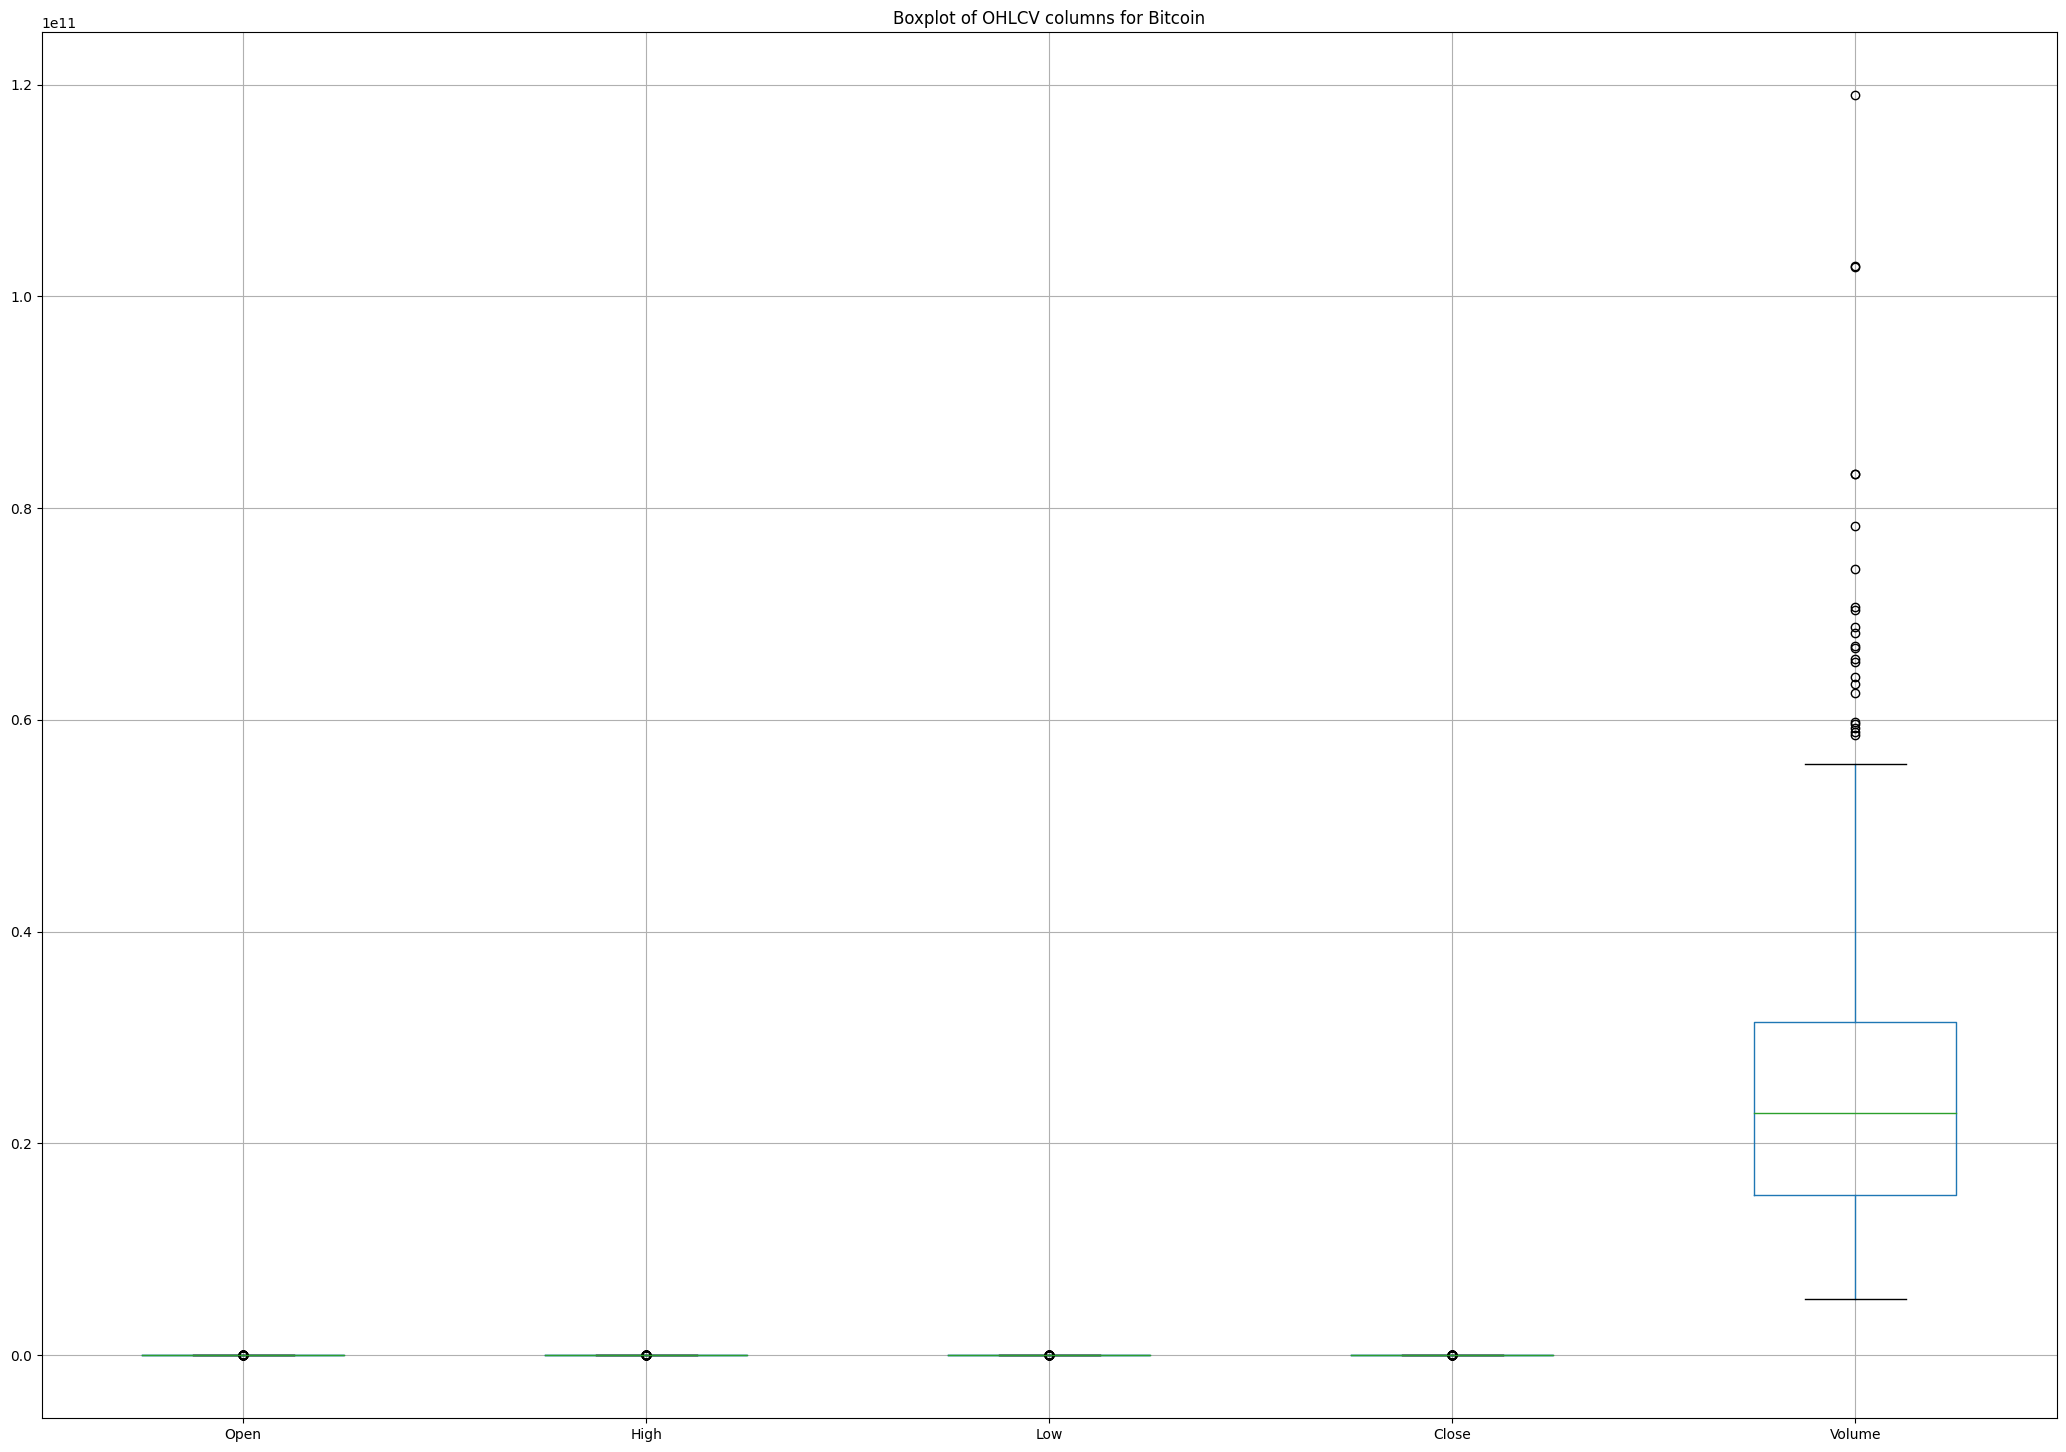


Ethereum Historical Data with Changes:


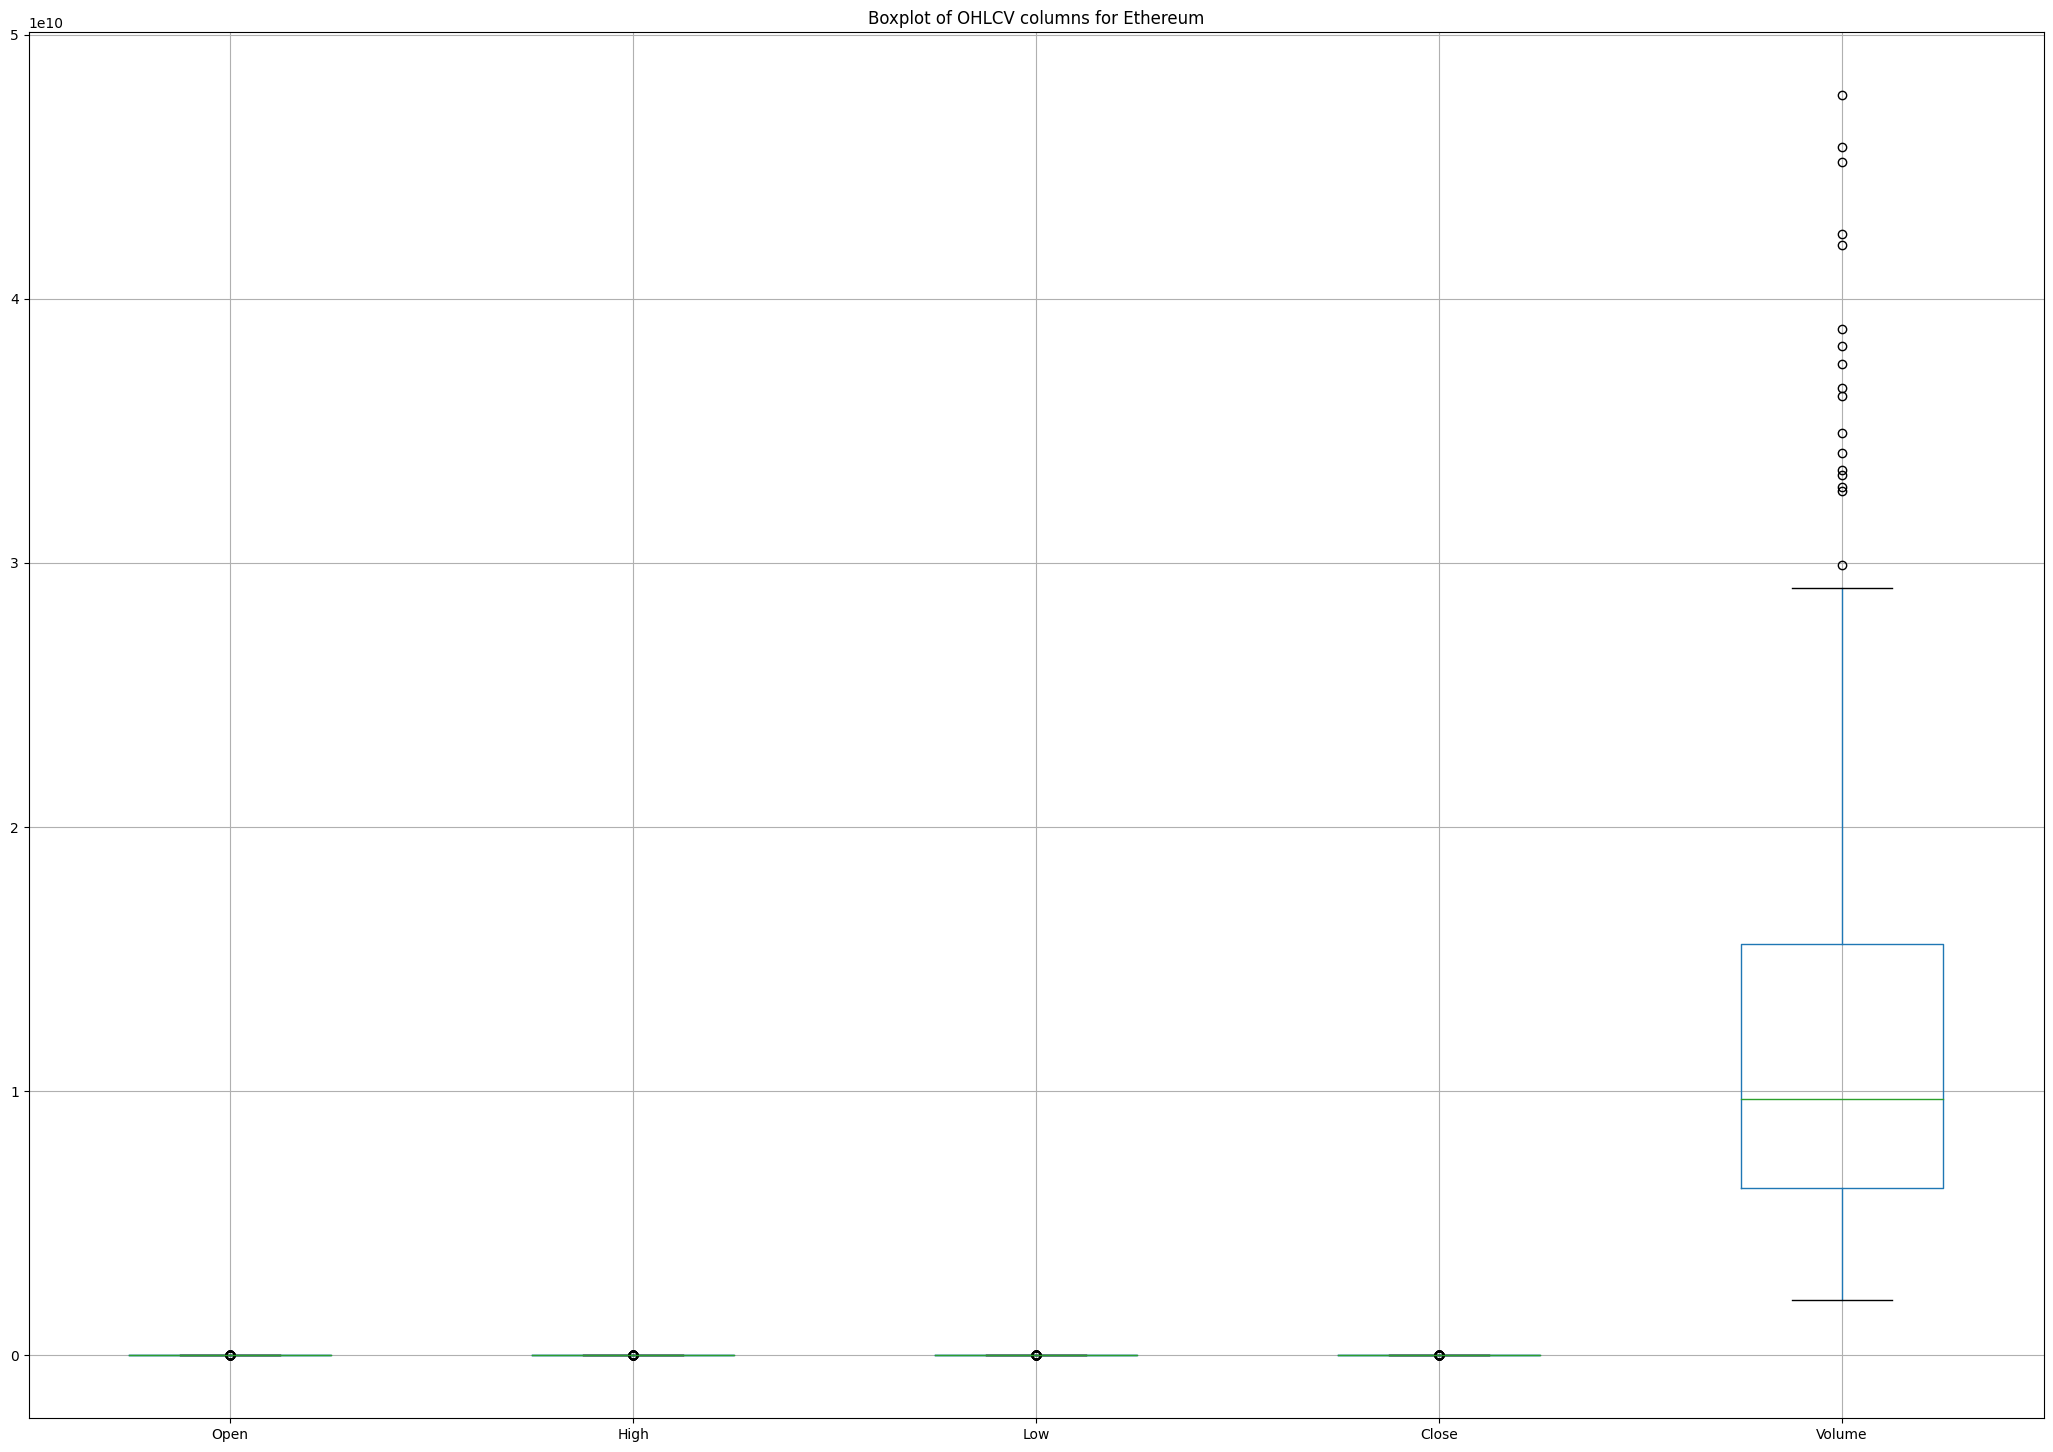


Tether Historical Data with Changes:


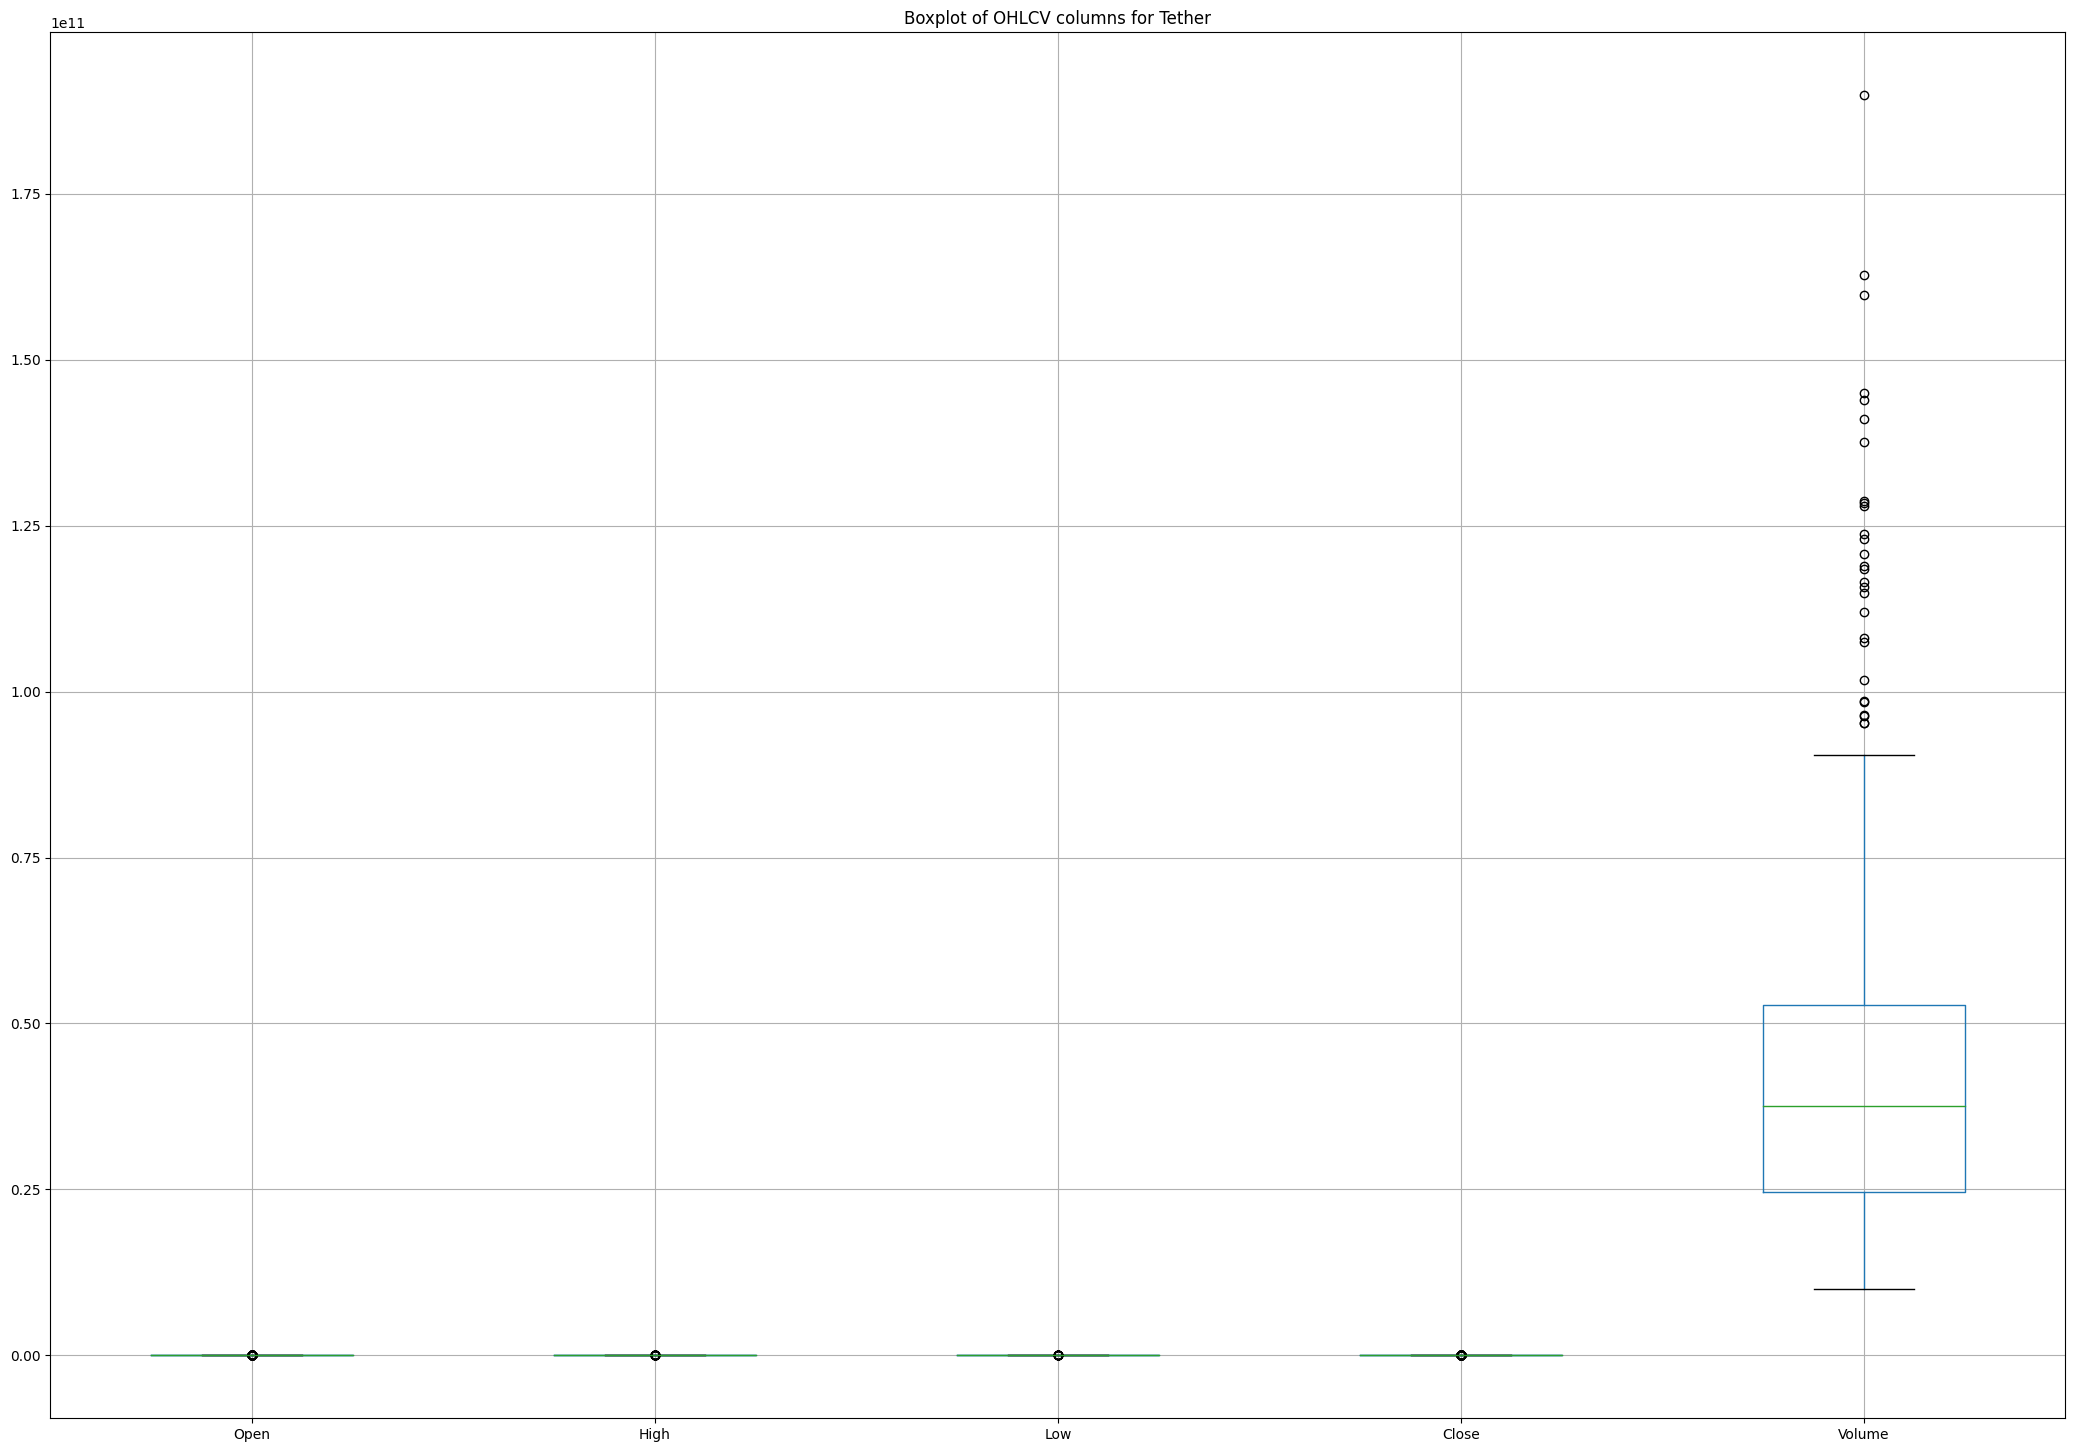


BNB Historical Data with Changes:


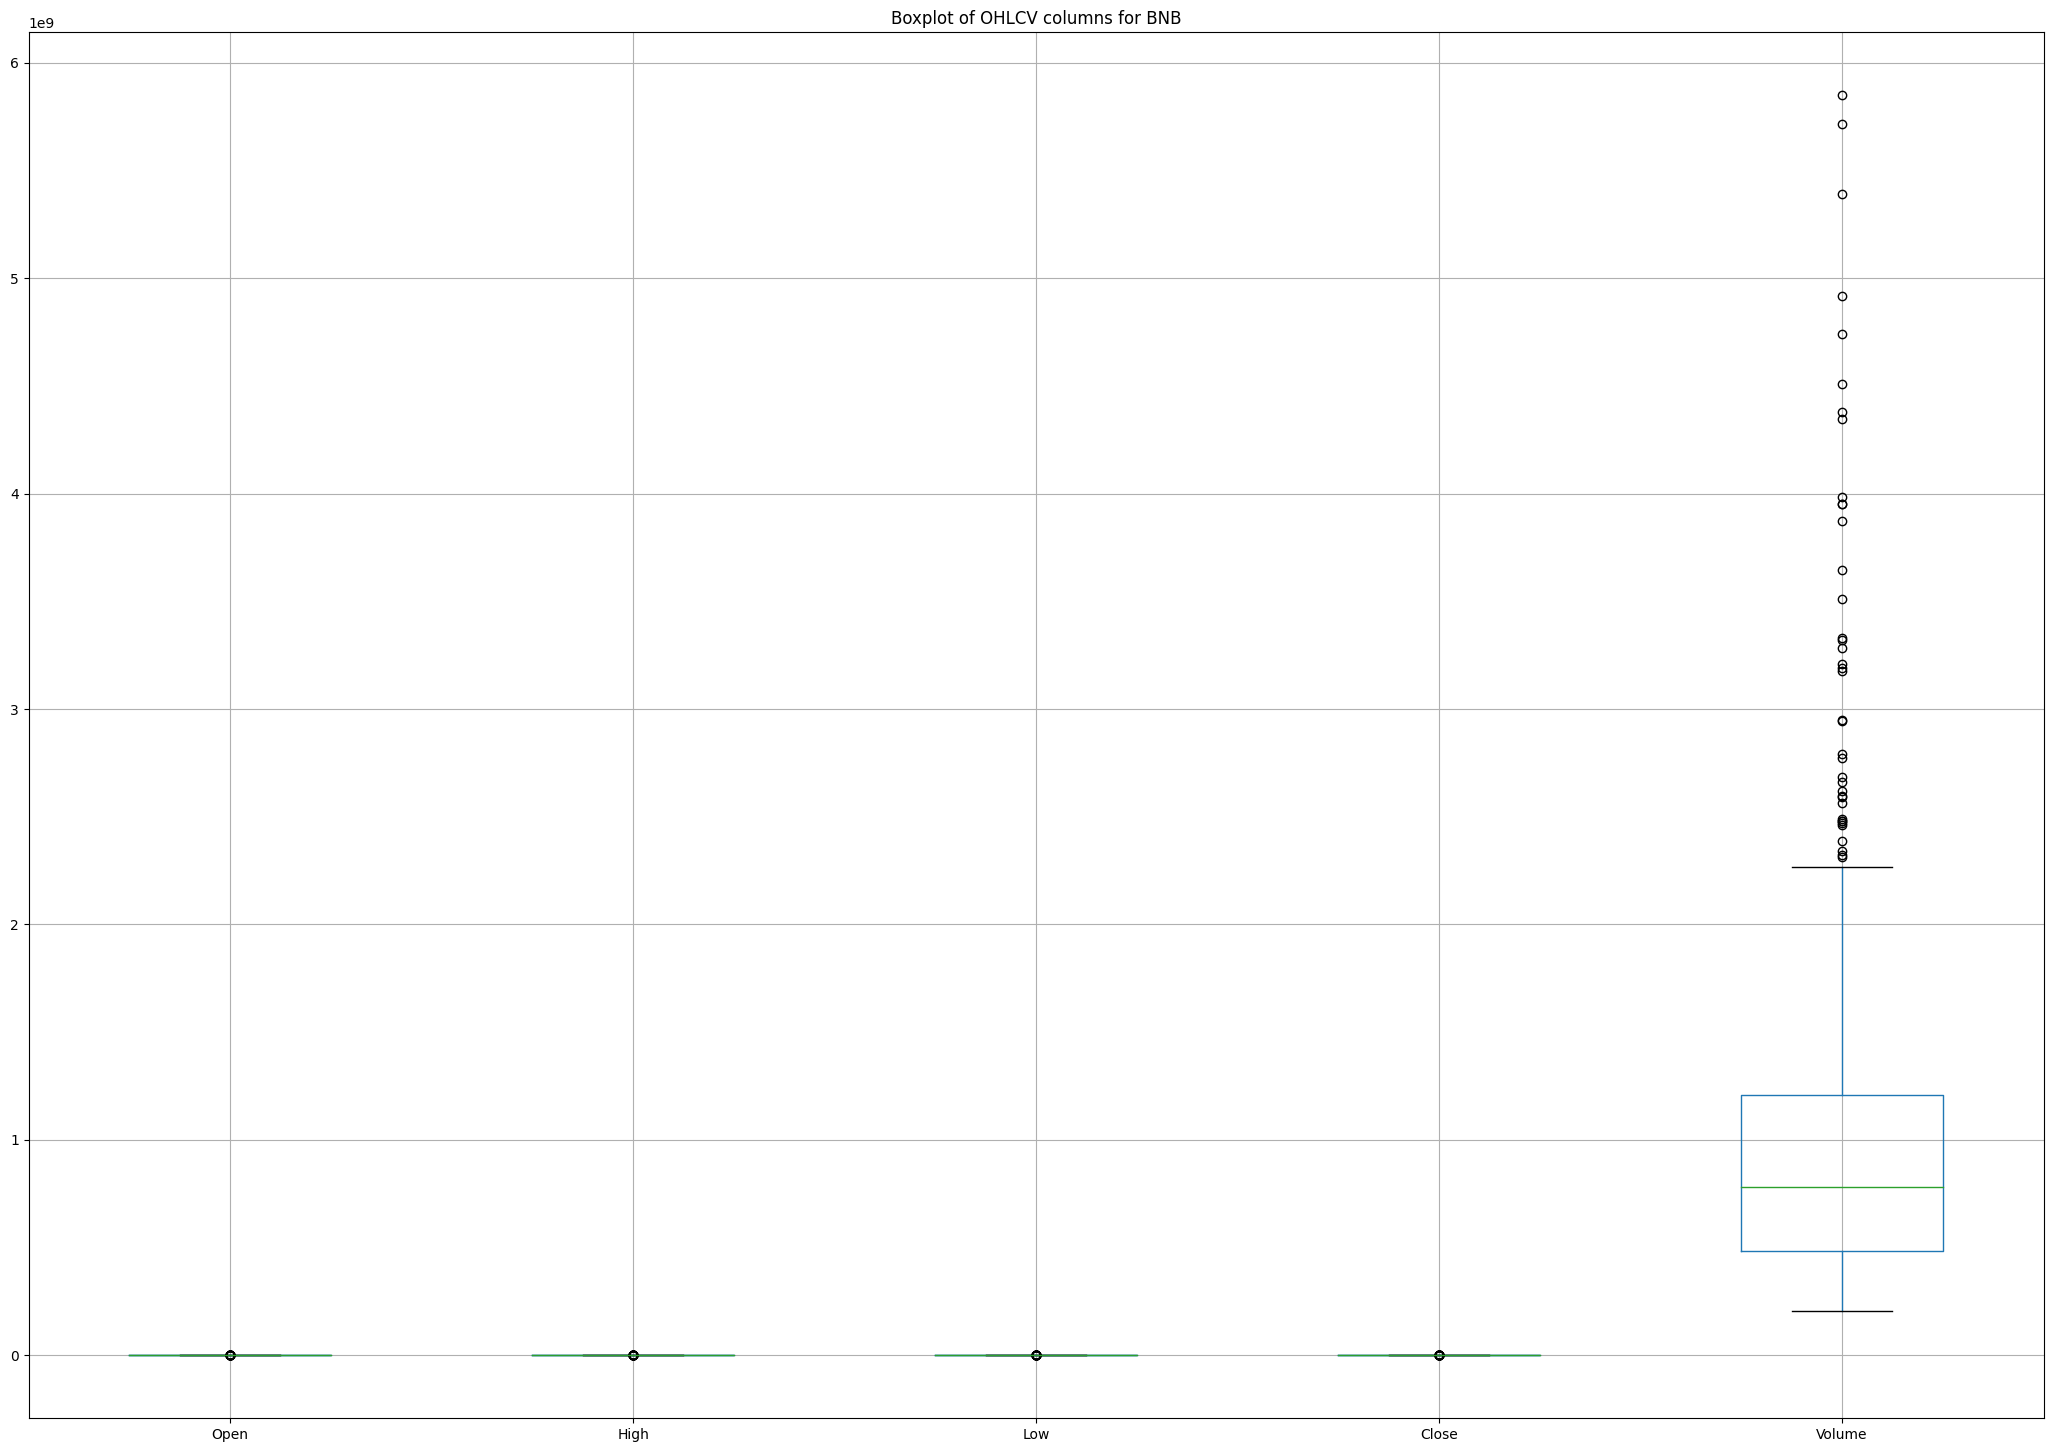


Solana Historical Data with Changes:


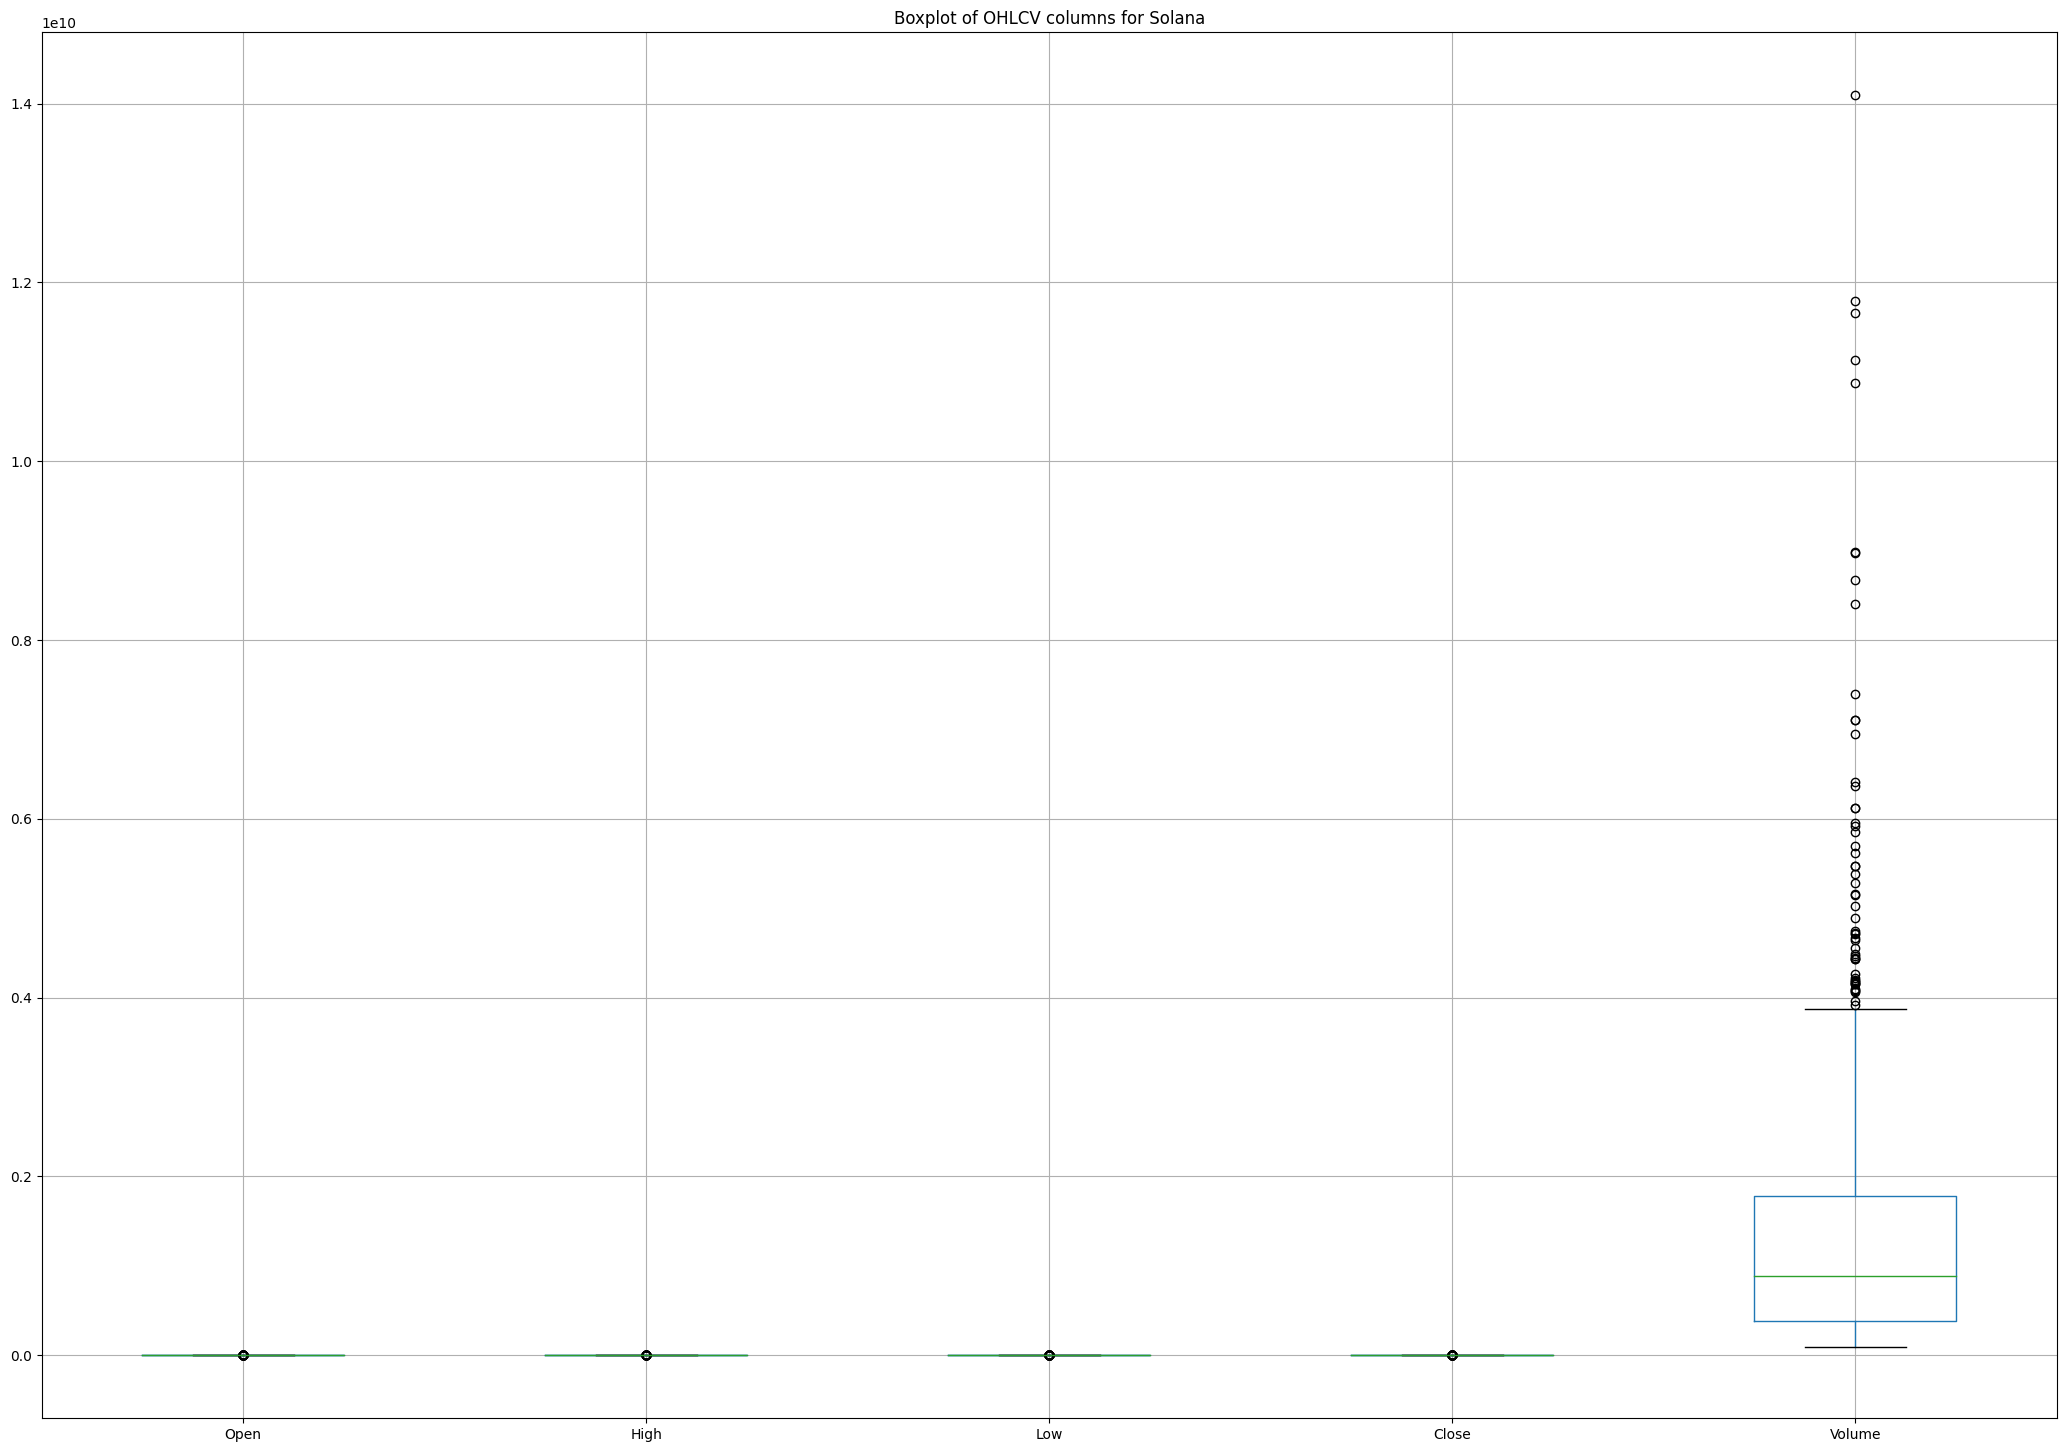


USDC Historical Data with Changes:


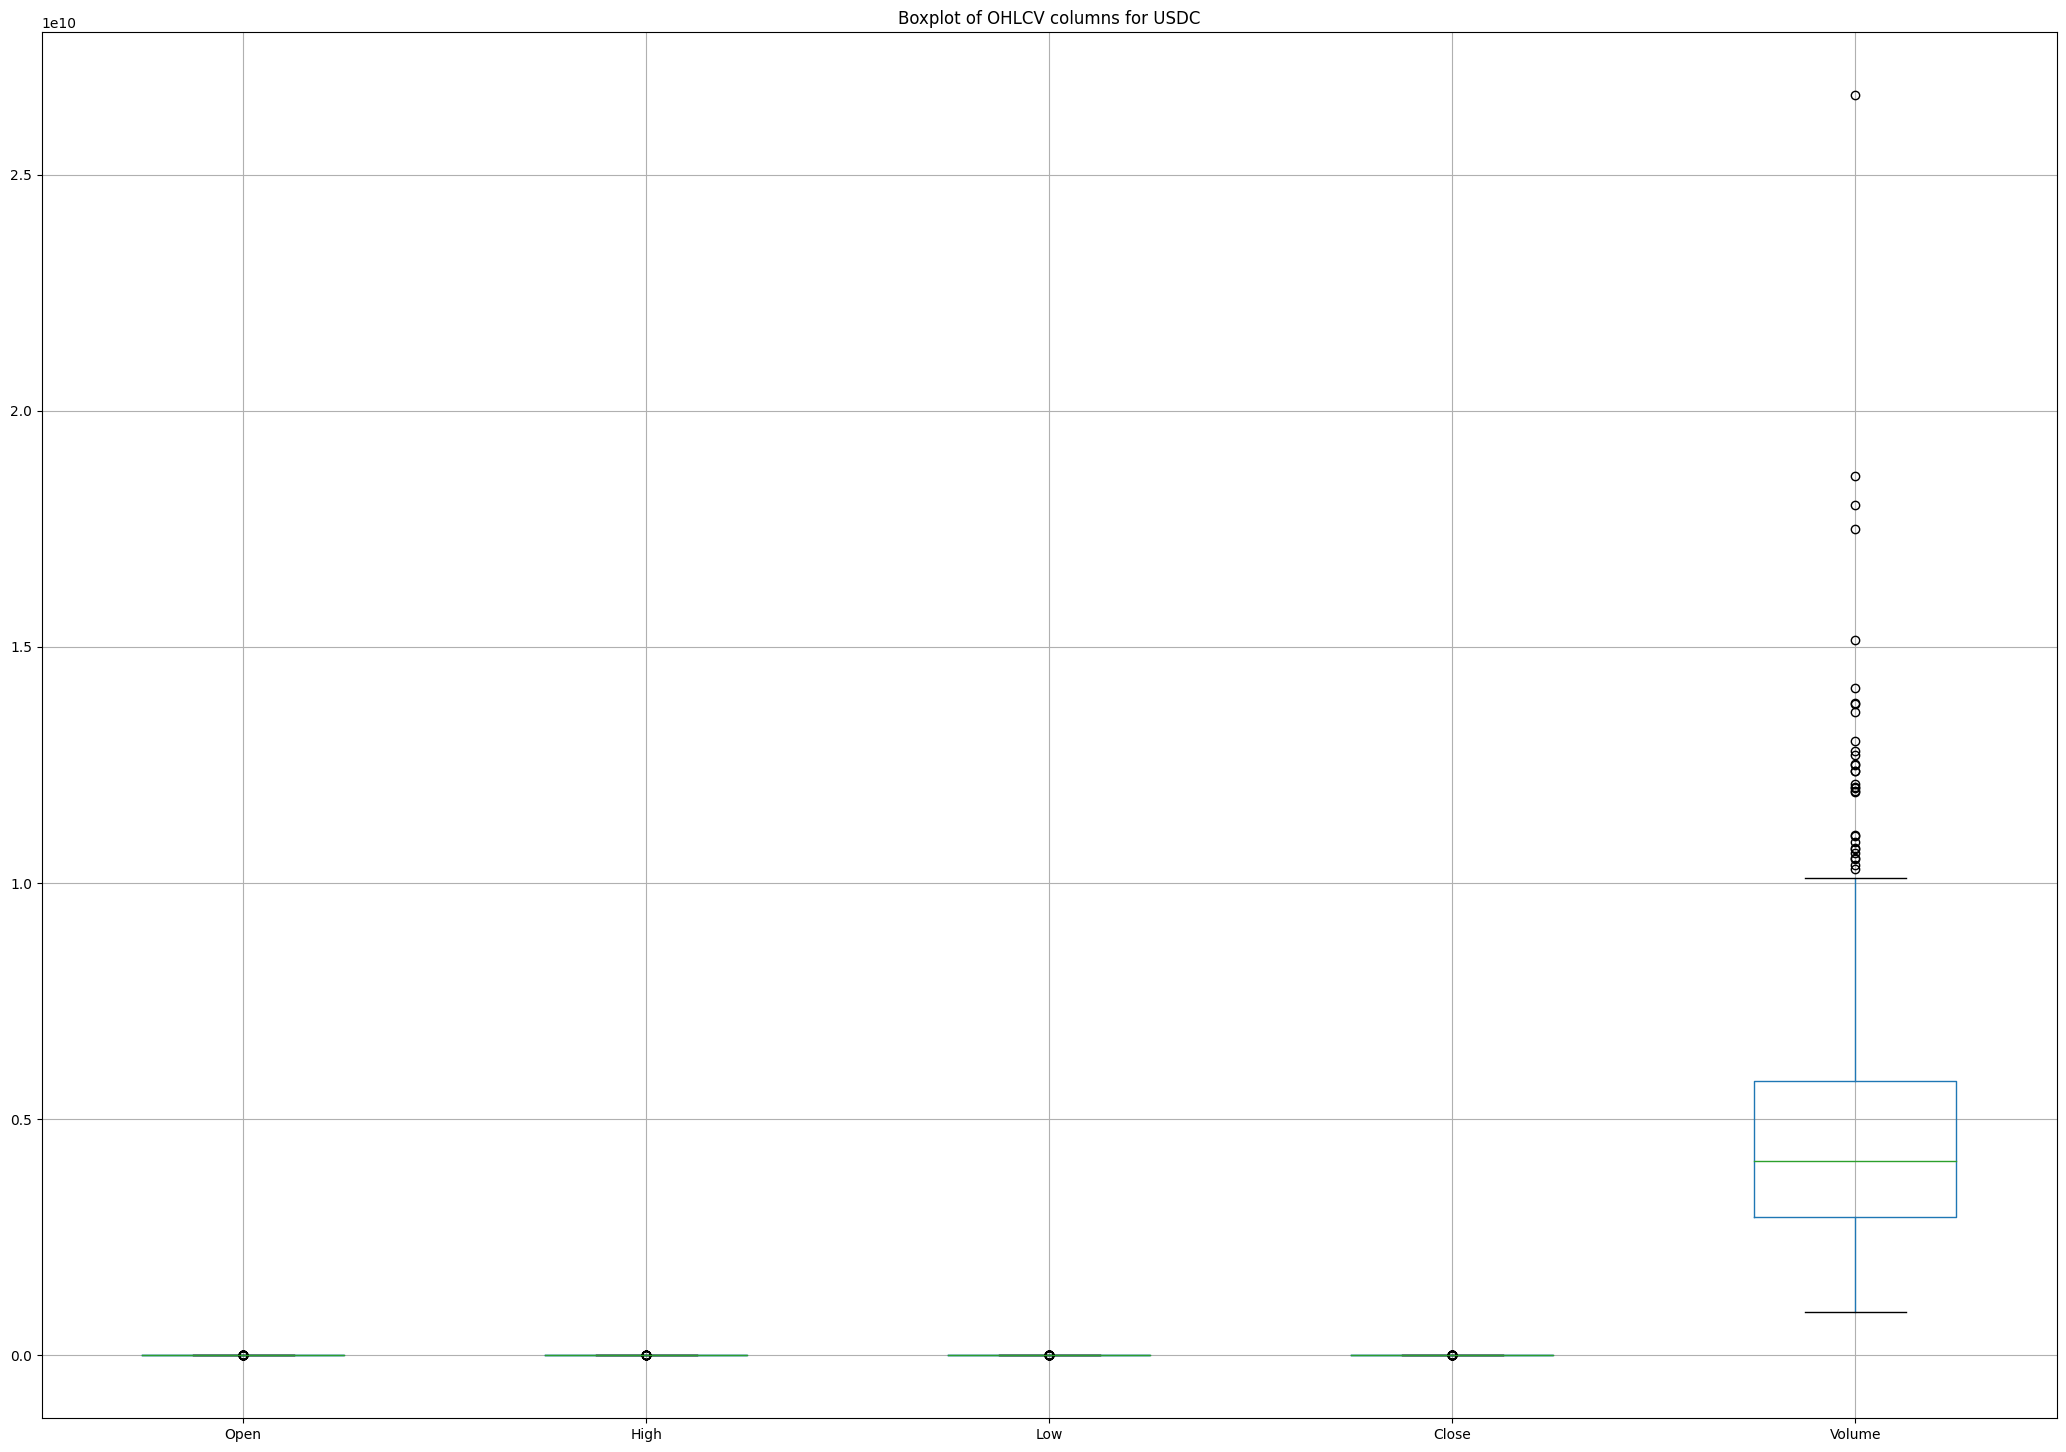


Lido Staked Ether Historical Data with Changes:


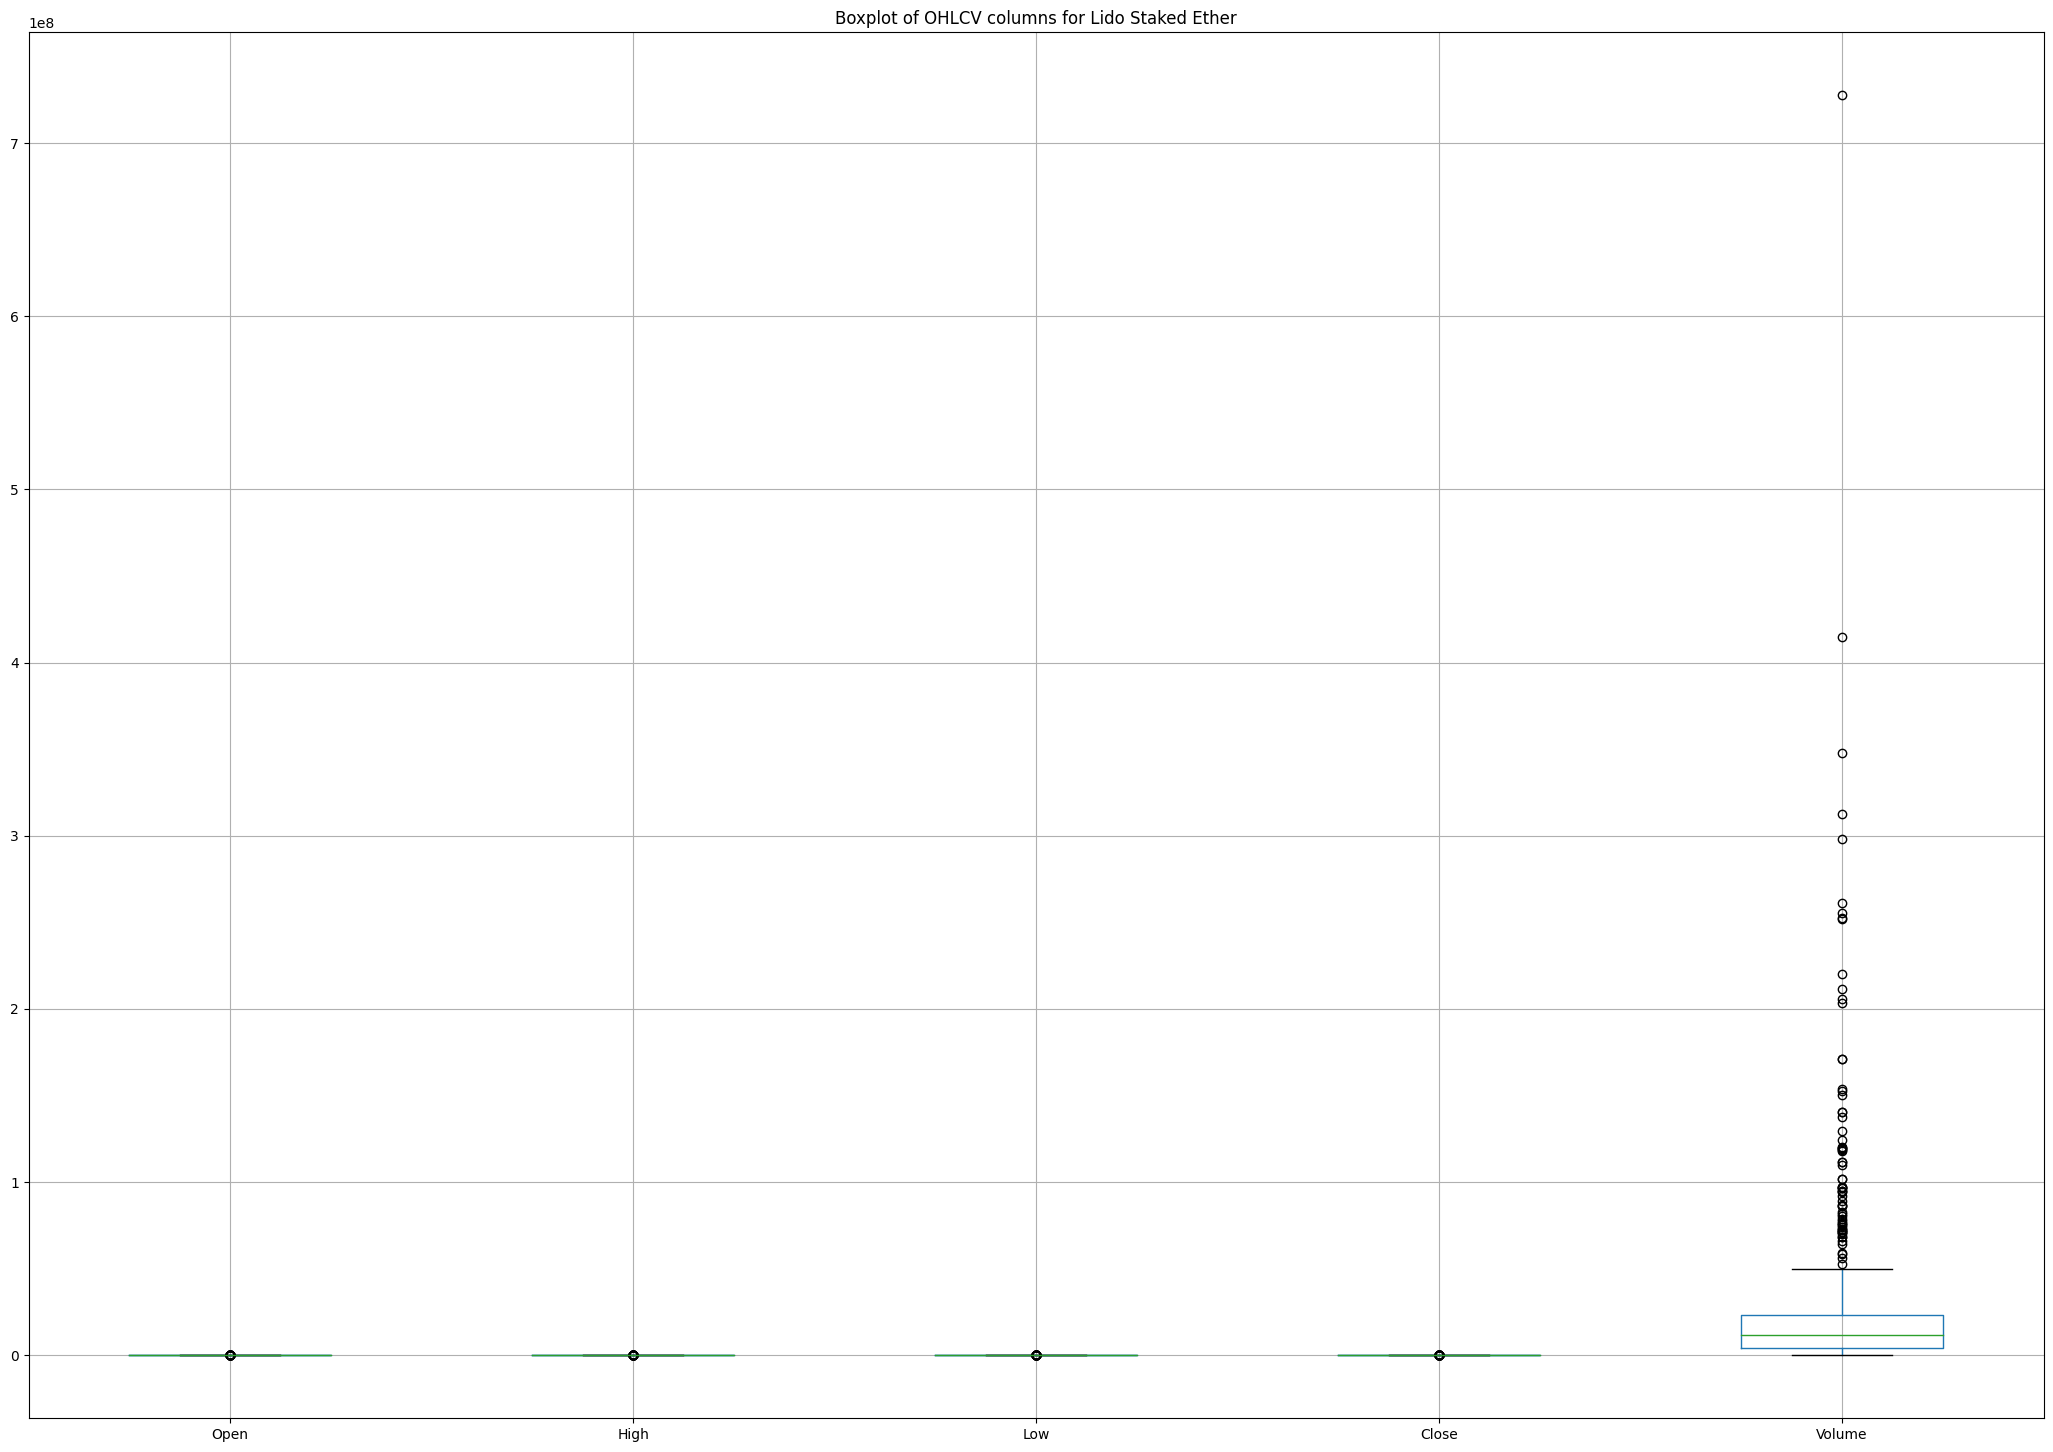


XRP Historical Data with Changes:


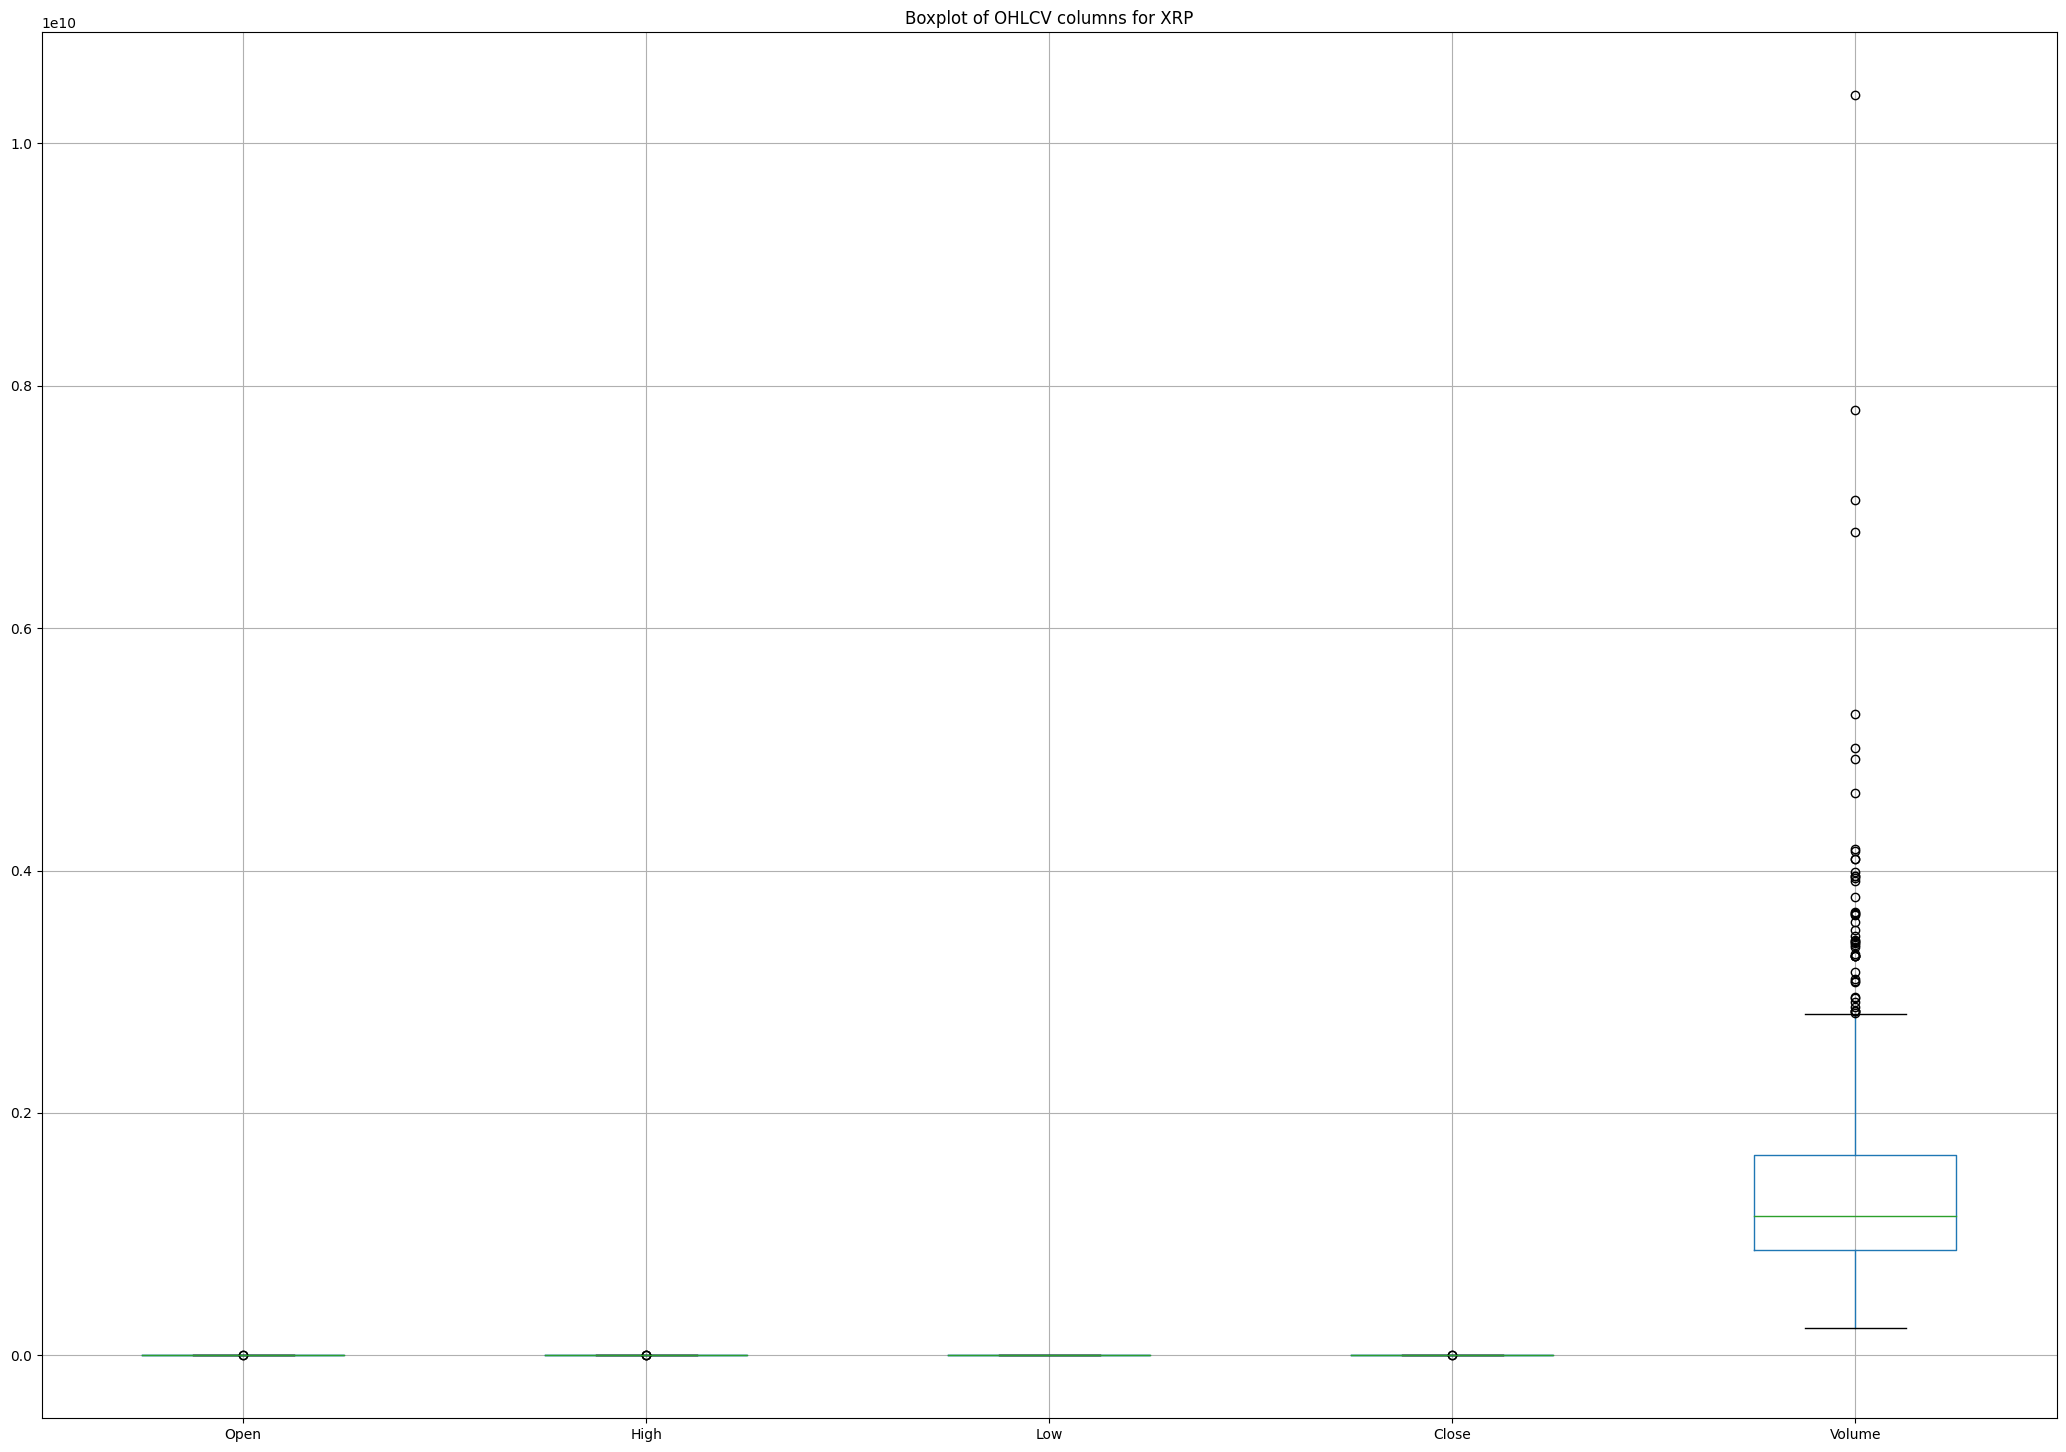


Dogecoin Historical Data with Changes:


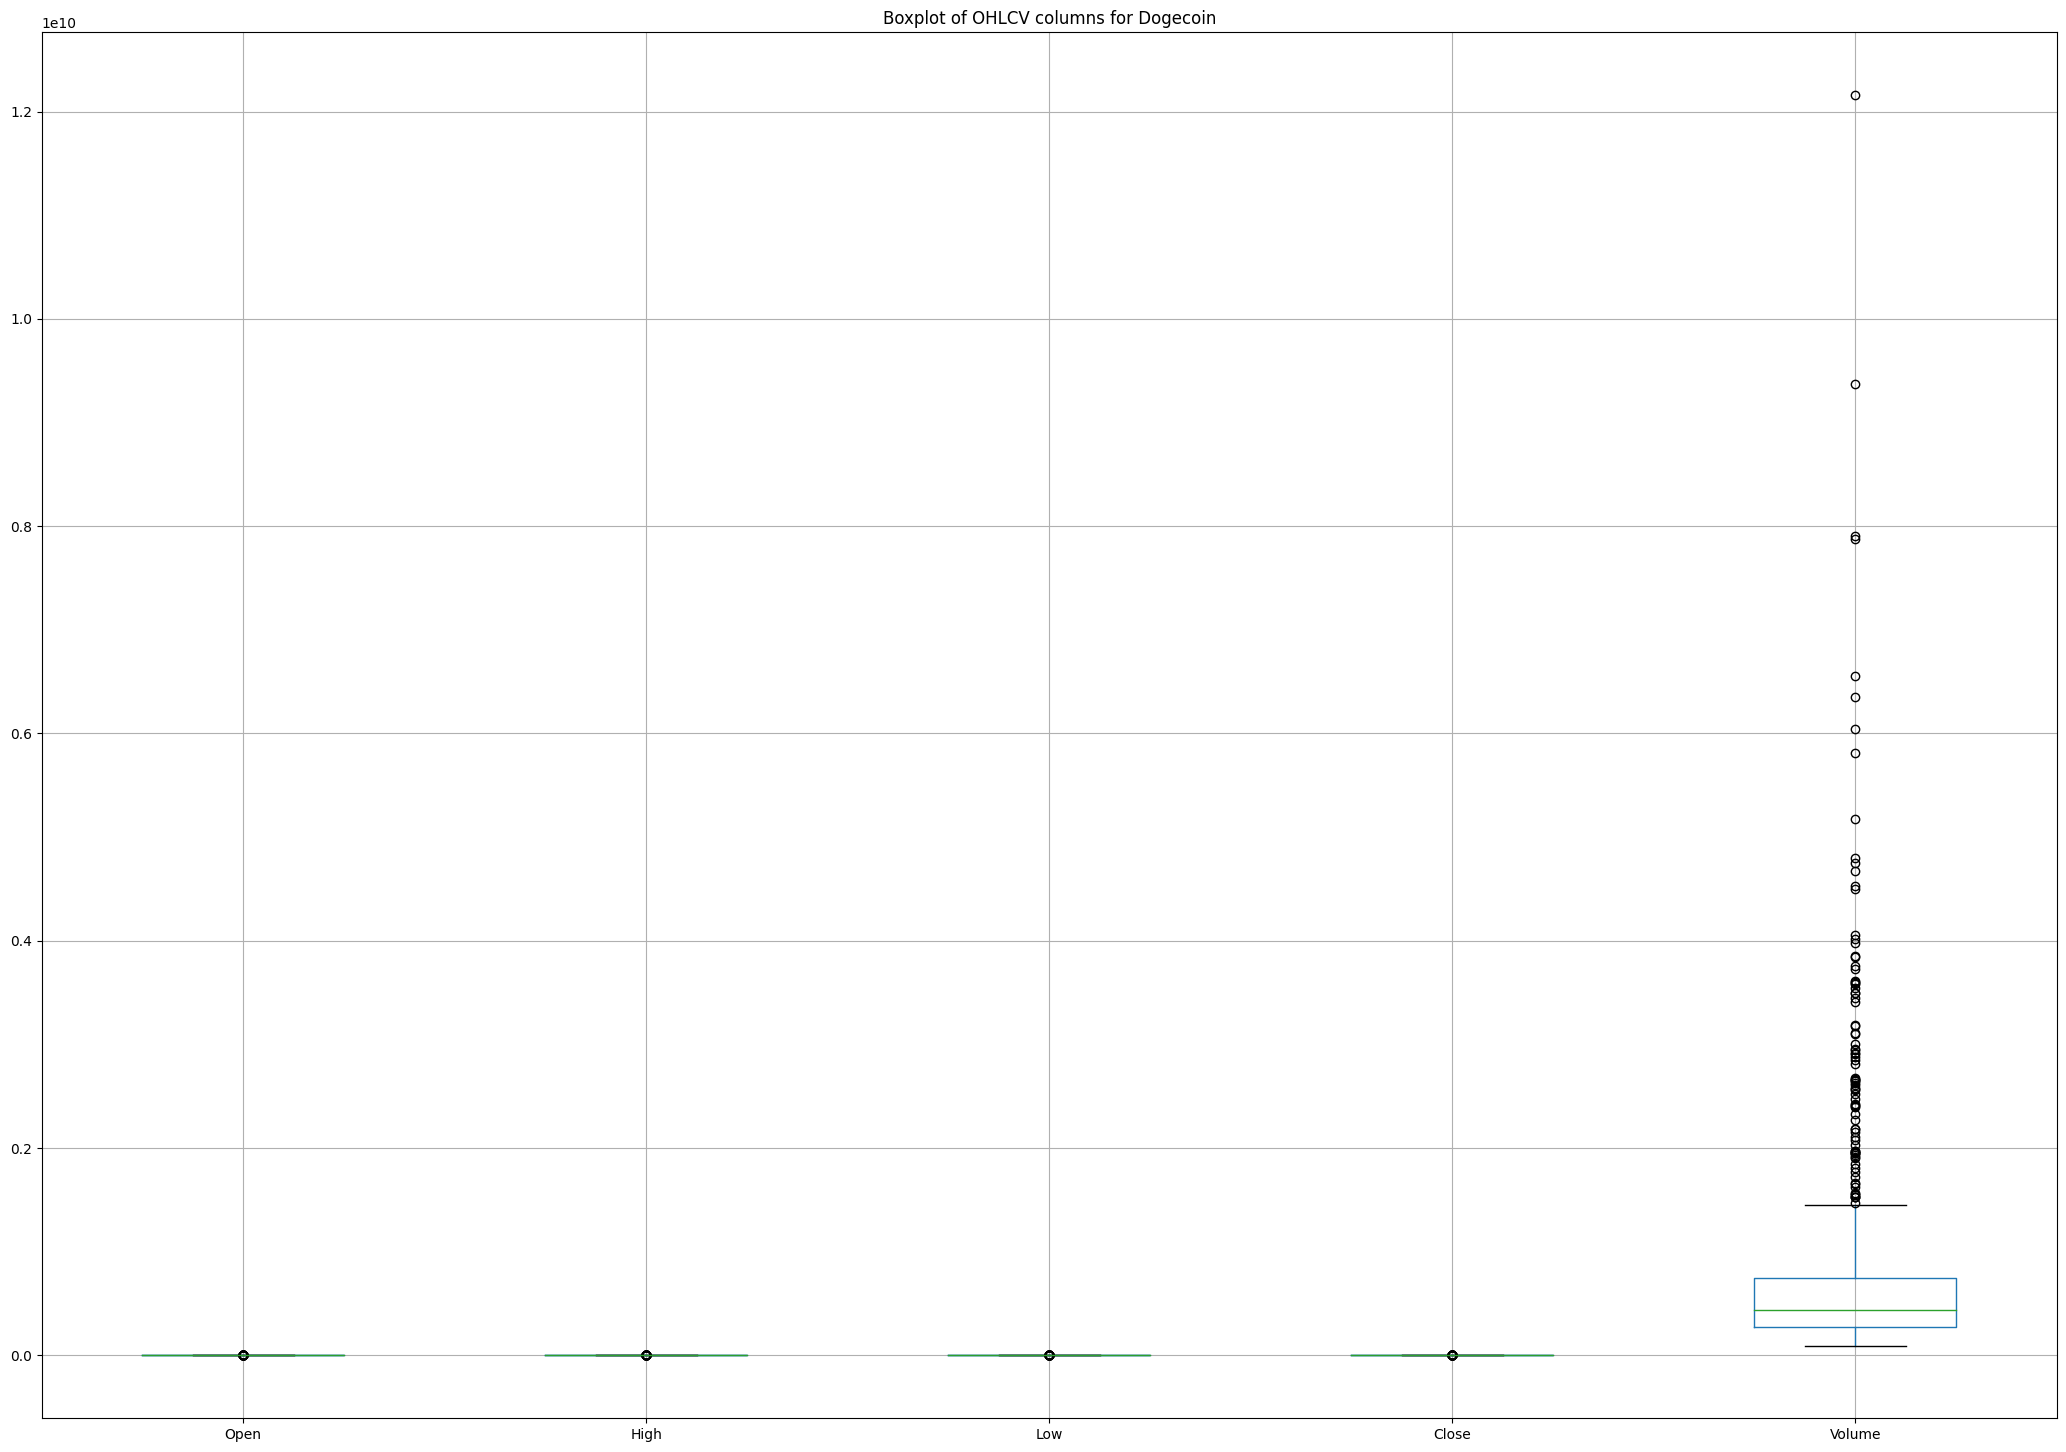

In [ ]:
# Update all dataframes in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():

    data.index = pd.to_datetime(data.index)


    if 'Adj Close' in data.columns:
        data.drop(['Adj Close'], axis=1, inplace=True)

    print(f"\n{crypto_name} Historical Data with Changes:")

    plt.figure(figsize=(26, 18))
    data.boxplot(column=['Open', 'High', 'Low', 'Close', 'Volume'])
    plt.title(f'Boxplot of OHLCV columns for {crypto_name}')
    plt.show()

In [ ]:
for crypto_name, data in crypto_dataframes.items():

    # Display the first few rows with new columns
    print(f"\n{crypto_name} Historical Data with Returns and Direction:")
    print(data.head())


Bitcoin Historical Data with Returns and Direction:
                    Open          High           Low         Close  \
Date                                                                 
2022-04-25  39472.605469  40491.753906  38338.378906  40458.308594   
2022-04-26  40448.421875  40713.890625  37884.984375  38117.460938   
2022-04-27  38120.300781  39397.917969  37997.312500  39241.121094   
2022-04-28  39241.429688  40269.464844  38941.421875  39773.828125   
2022-04-29  39768.617188  39887.269531  38235.535156  38609.824219   

                 Volume  
Date                     
2022-04-25  35445730570  
2022-04-26  34569088416  
2022-04-27  30981015184  
2022-04-28  33903704907  
2022-04-29  30882994649  

Ethereum Historical Data with Returns and Direction:
                   Open         High          Low        Close       Volume
Date                                                                       
2022-04-25  2922.990234  3018.415527  2804.507080  3009.393555  2233


Bitcoin Historical Data after Z-Score Filtering:
                    Open          High           Low         Close  \
Date                                                                 
2022-04-25  39472.605469  40491.753906  38338.378906  40458.308594   
2022-04-26  40448.421875  40713.890625  37884.984375  38117.460938   
2022-04-27  38120.300781  39397.917969  37997.312500  39241.121094   
2022-04-28  39241.429688  40269.464844  38941.421875  39773.828125   
2022-04-29  39768.617188  39887.269531  38235.535156  38609.824219   

                 Volume  
Date                     
2022-04-25  35445730570  
2022-04-26  34569088416  
2022-04-27  30981015184  
2022-04-28  33903704907  
2022-04-29  30882994649  


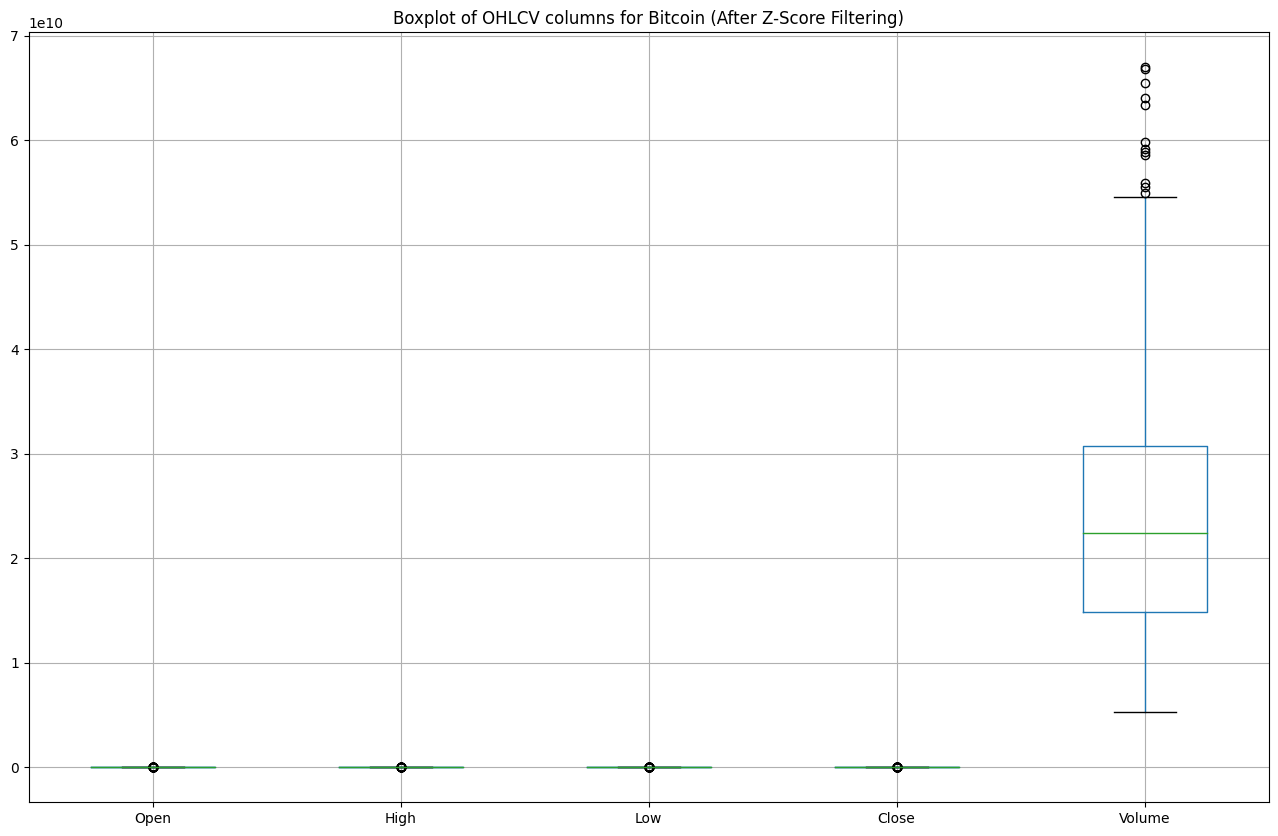


Ethereum Historical Data after Z-Score Filtering:
                   Open         High          Low        Close       Volume
Date                                                                       
2022-04-25  2922.990234  3018.415527  2804.507080  3009.393555  22332690614
2022-04-26  3008.946289  3026.415039  2786.253174  2808.298340  19052045399
2022-04-27  2808.645996  2911.877441  2802.273438  2888.929688  17419284041
2022-04-28  2888.849854  2973.135010  2861.821533  2936.940918  18443524633
2022-04-29  2936.776611  2943.445801  2782.435303  2815.601807  18771041399


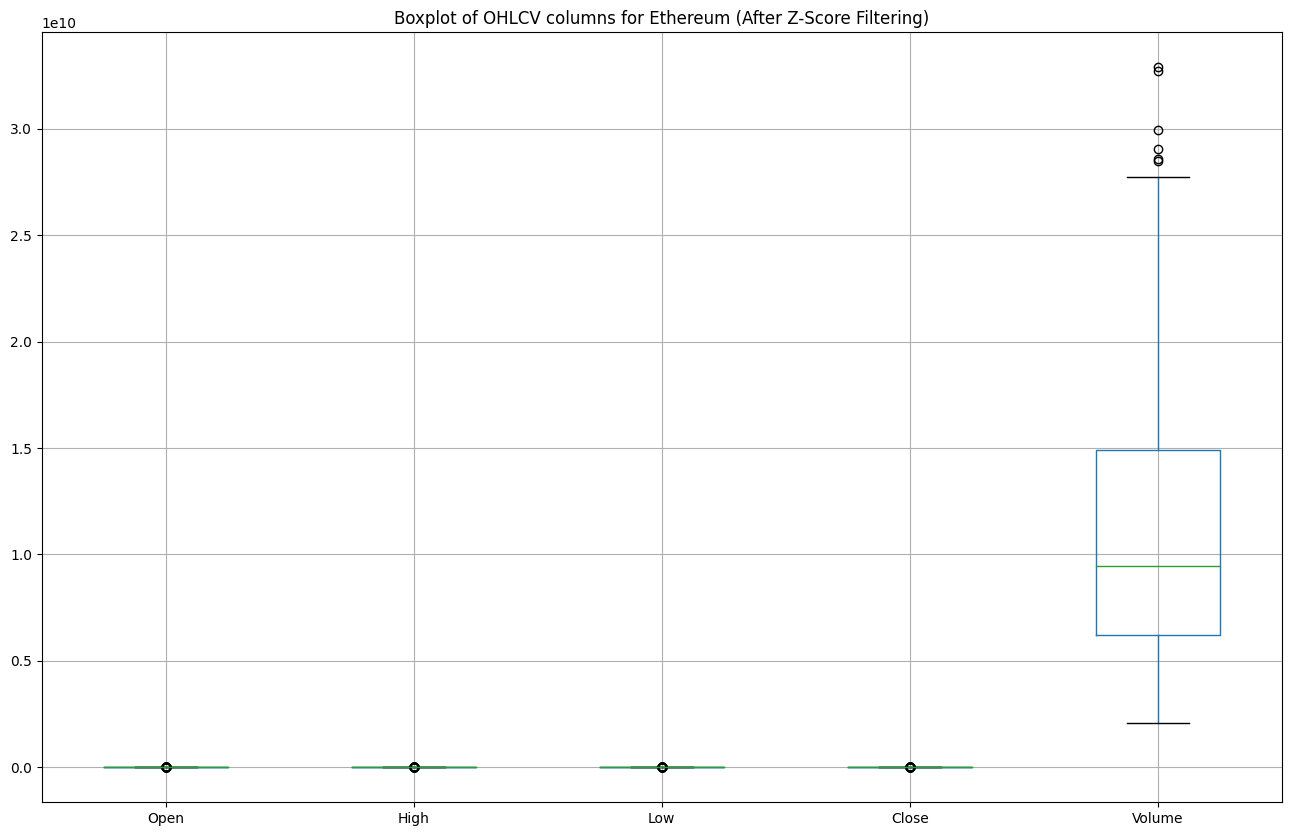


Tether Historical Data after Z-Score Filtering:
                Open      High       Low     Close       Volume
Date                                                           
2022-04-25  1.000346  1.000393  1.000103  1.000145  73256647805
2022-04-26  1.000131  1.000265  1.000040  1.000073  69068297656
2022-04-27  1.000059  1.000284  1.000013  1.000153  61043327313
2022-04-28  1.000155  1.000292  1.000028  1.000191  68392086439
2022-04-29  1.000200  1.000238  0.999986  1.000020  67899674445


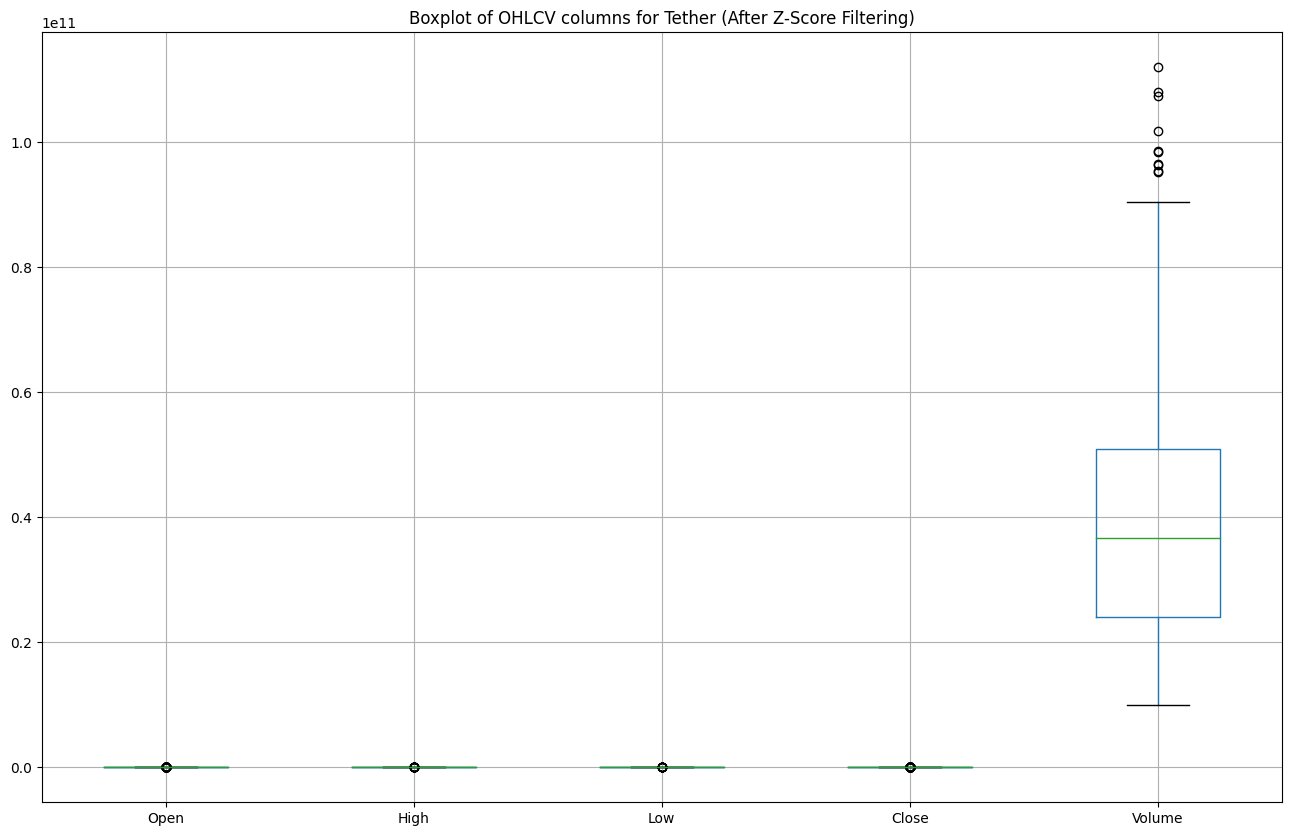


BNB Historical Data after Z-Score Filtering:
                  Open        High         Low       Close      Volume
Date                                                                  
2022-04-25  399.129913  404.873901  383.190674  404.350281  1910707893
2022-04-26  404.268860  407.084503  382.080994  385.483063  1671963898
2022-04-27  385.562164  394.458527  384.077698  391.445831  1512587369
2022-04-28  391.438660  408.232452  388.877655  406.718201  2116381172
2022-04-29  406.641724  410.175781  390.539978  393.062164  1928209754


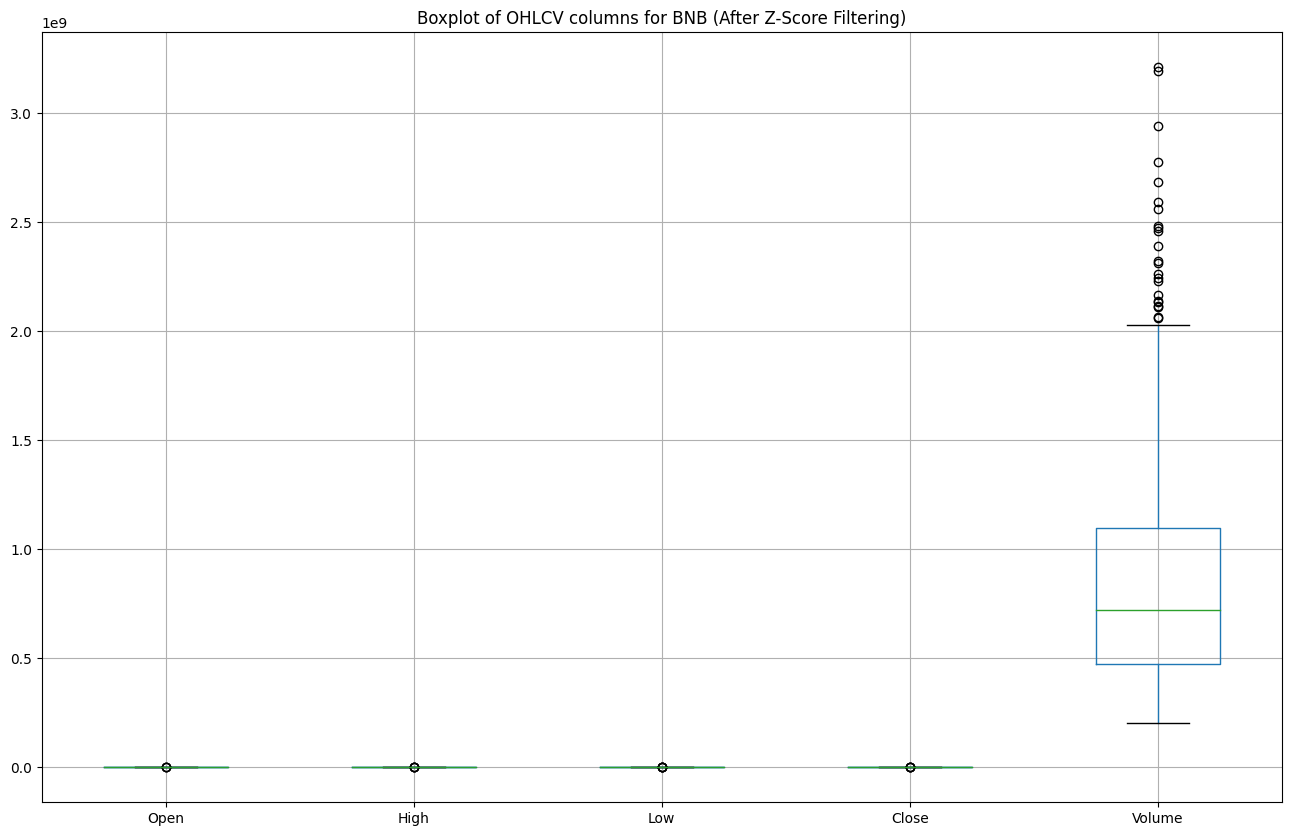


Solana Historical Data after Z-Score Filtering:
                  Open        High        Low       Close      Volume
Date                                                                 
2022-04-25   99.241409  101.440590  94.755753  101.247635  1538486689
2022-04-26  101.224876  101.742485  95.177895   95.782150  1301074534
2022-04-27   95.785522  100.544930  95.283501   98.378868  1253566599
2022-04-28   98.382149  100.401230  96.694527   98.185730  1307131609
2022-04-29   98.182961   98.568565  92.884270   94.011345  1234575023


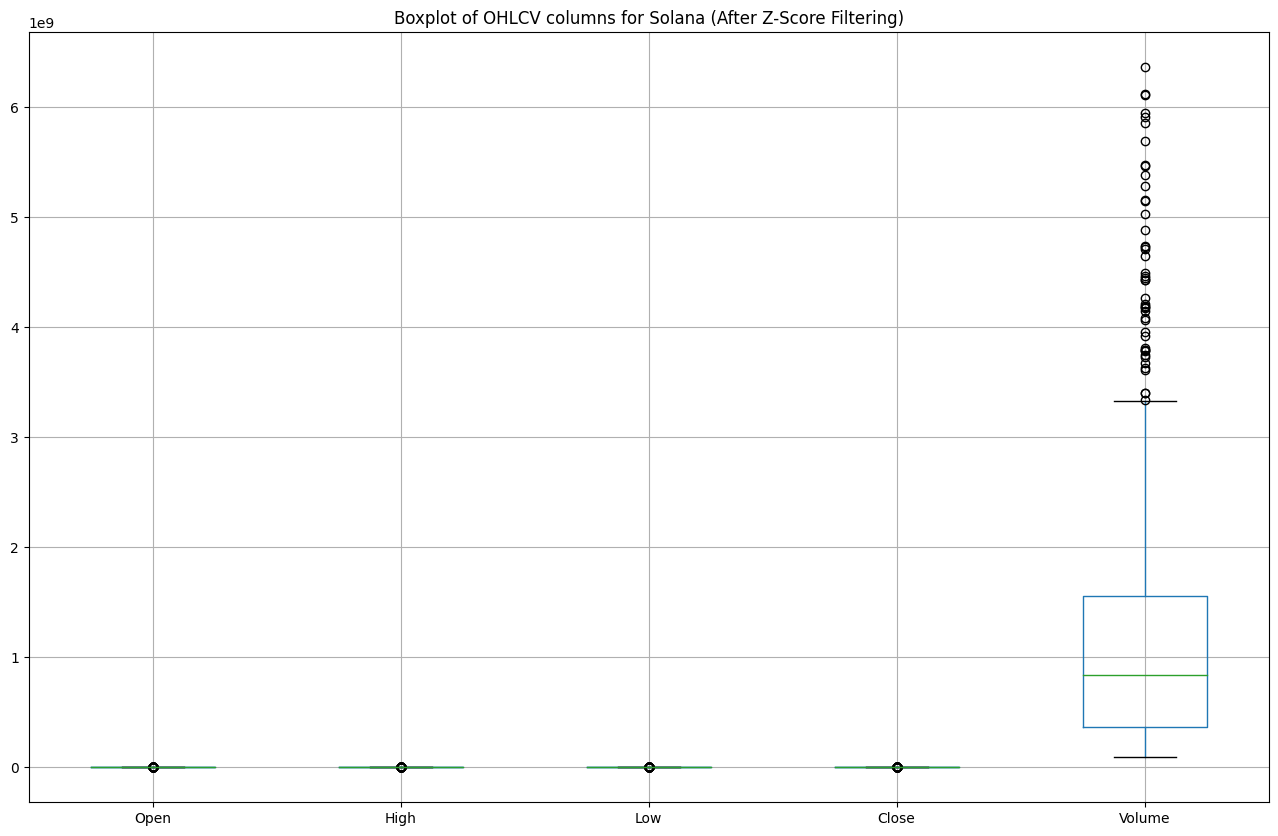


USDC Historical Data after Z-Score Filtering:
                Open      High       Low     Close      Volume
Date                                                          
2022-04-25  0.999960  1.002028  0.999400  1.000218  4720363070
2022-04-26  1.000192  1.001826  0.999363  1.000127  4221564998
2022-04-27  1.000129  1.000839  0.999535  1.000321  3849488651
2022-04-28  1.000310  1.000505  0.999507  1.000029  4611631886
2022-04-29  1.000007  1.000417  0.999542  1.000023  4076411418


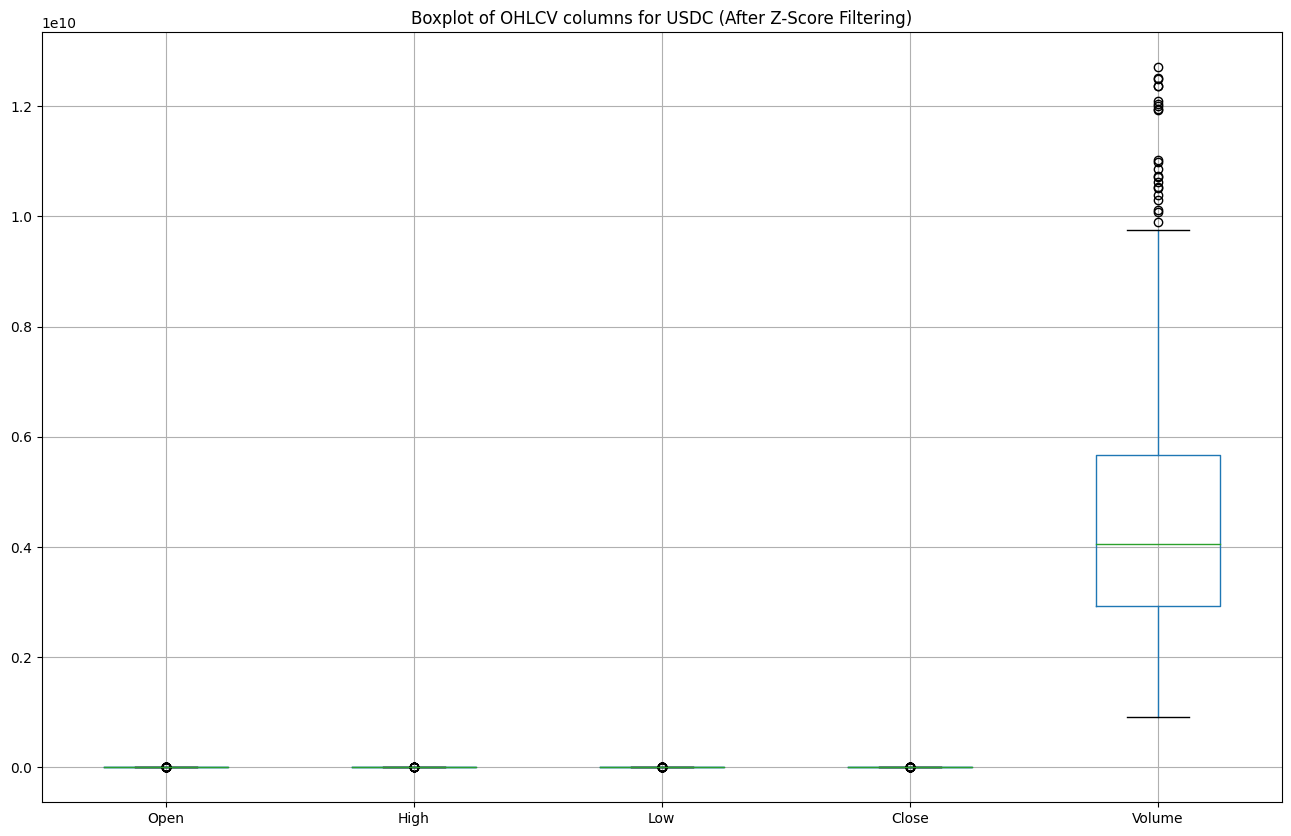


Lido Staked Ether Historical Data after Z-Score Filtering:
                   Open         High          Low        Close  Volume
Date                                                                  
2022-04-25  2916.731201  3013.476807  2798.380615  3002.082764  871485
2022-04-26  3000.308105  3016.447266  2773.680908  2799.362061  732428
2022-04-27  2803.580811  2903.059570  2795.255371  2883.189941  427442
2022-04-28  2883.270996  2969.980957  2843.346191  2928.583740  377861
2022-04-29  2928.445068  2937.212891  2761.613770  2804.656006  311825


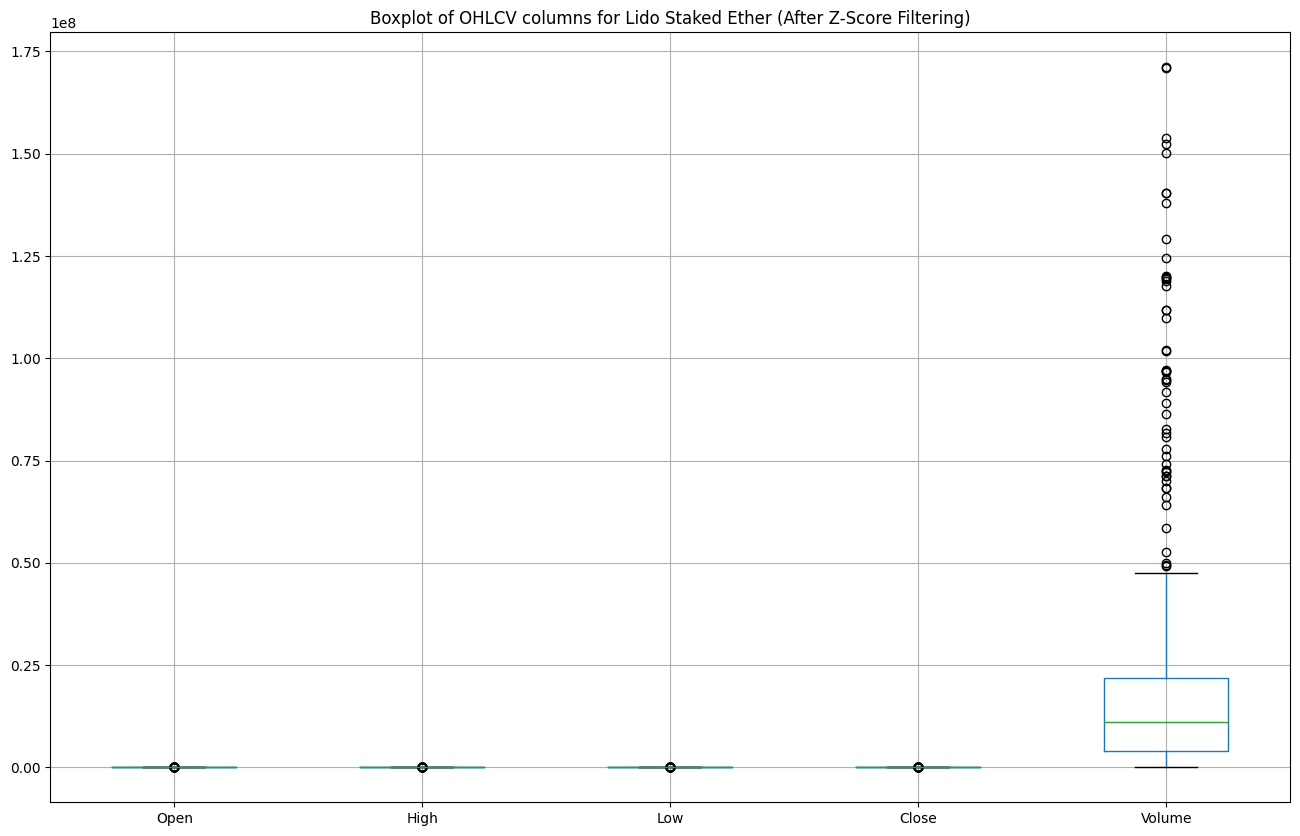


XRP Historical Data after Z-Score Filtering:
                Open      High       Low     Close      Volume
Date                                                          
2022-04-25  0.698757  0.698940  0.648242  0.694426  2377291271
2022-04-26  0.694334  0.704096  0.634417  0.641699  2160649427
2022-04-27  0.641794  0.661377  0.640380  0.652318  1722422062
2022-04-28  0.652313  0.655344  0.636268  0.644363  1546067106
2022-04-29  0.644284  0.645610  0.603904  0.611407  1962197662


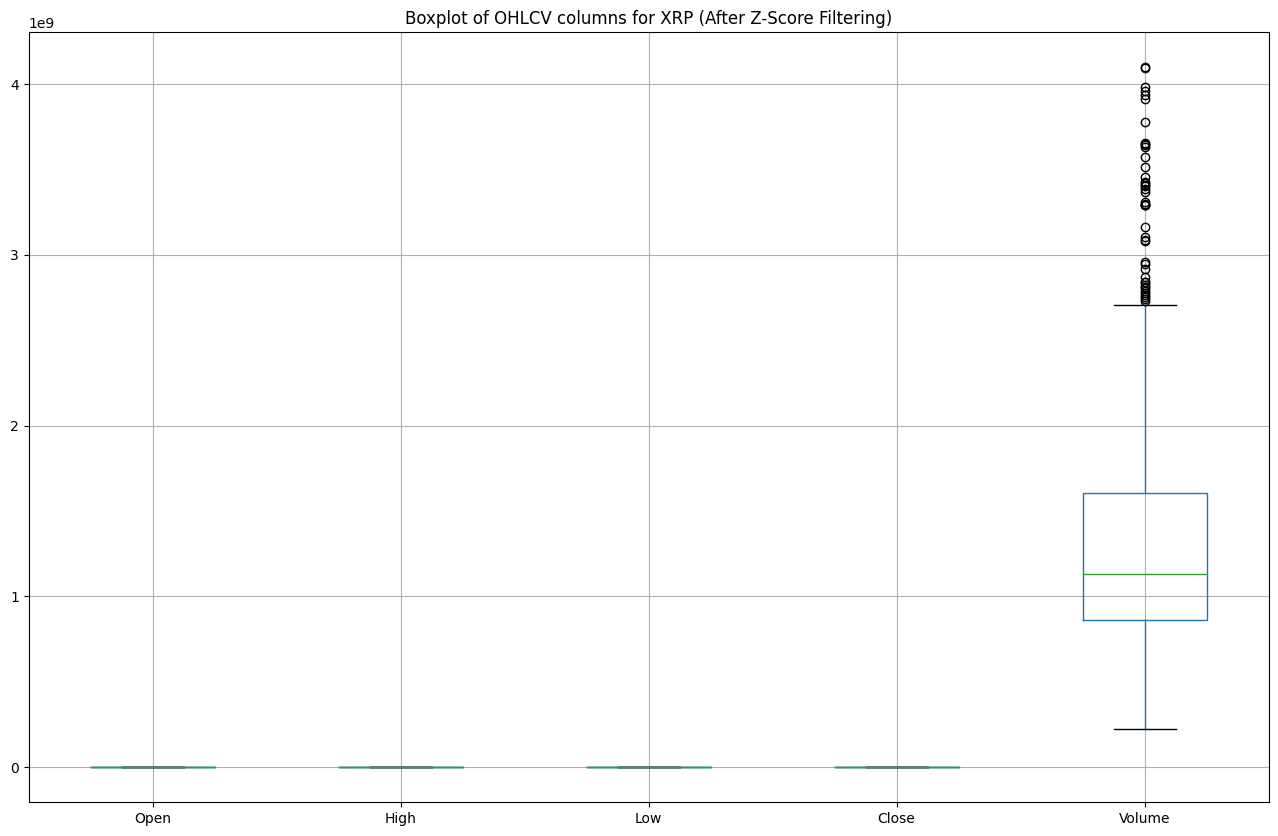


Dogecoin Historical Data after Z-Score Filtering:
                Open      High       Low     Close      Volume
Date                                                          
2022-04-27  0.137847  0.145405  0.136272  0.139700  1765370972
2022-04-28  0.139691  0.142618  0.136058  0.137363  1105137506
2022-04-29  0.137376  0.144643  0.134099  0.135027  1555397213
2022-04-30  0.135033  0.136528  0.126239  0.127557   916612071
2022-05-01  0.127589  0.134821  0.127533  0.132773   991710768


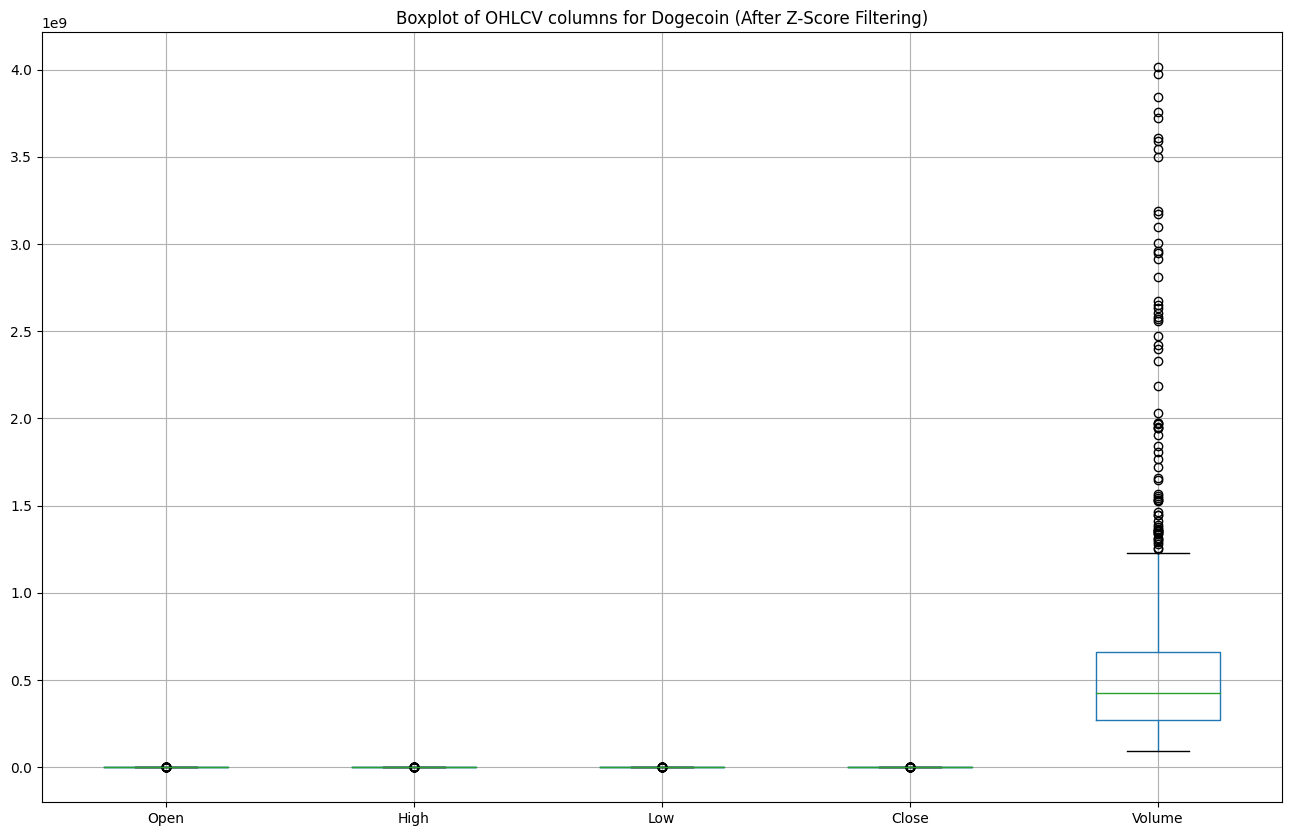

In [ ]:


# Calculate Z-Scores and filter for all dataframes in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Numeric columns to avoid Datetime column
    numeric_cols = data.select_dtypes(include=[np.number]).columns

    # Calculate Z-Scores
    z_scores = data[numeric_cols].apply(zscore)

    # Absolute Z-Scores
    abs_z_scores = np.abs(z_scores)

    # Filter entries
    filtered_entries = (abs_z_scores < 3).all(axis=1)

    # Apply the filter to the dataframe
    data = data[filtered_entries]

    # Display the first few rows after filtering
    print(f"\n{crypto_name} Historical Data after Z-Score Filtering:")
    print(data.head())

    # Plot boxplot for the filtered data
    plt.figure(figsize=(16, 10))
    data.boxplot(column=['Open', 'High', 'Low', 'Close', 'Volume'])
    plt.title(f'Boxplot of OHLCV columns for {crypto_name} (After Z-Score Filtering)')
    plt.show()


In [ ]:
# Calculate 'returns' and 'direction' for each dataframe in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Add 'returns' and 'direction' columns
    data['returns'] = np.log(data['Close'] / data['Close'].shift(1))  # calculates the pct returns
    data.dropna(inplace=True)  # drop rows with missing columns
    data['direction'] = np.sign(data['returns']).astype(int).shift(-1)  # assigns the changes a direction

    # Display the first few rows with new columns
    print(f"\n{crypto_name} Historical Data with Returns and Direction:")
    print(data[['Close', 'returns', 'direction']].head())



Bitcoin Historical Data with Returns and Direction:
                   Close   returns  direction
Date                                         
2022-04-26  38117.460938 -0.059600        1.0
2022-04-27  39241.121094  0.029053        1.0
2022-04-28  39773.828125  0.013484       -1.0
2022-04-29  38609.824219 -0.029702       -1.0
2022-04-30  37714.875000 -0.023452        1.0

Ethereum Historical Data with Returns and Direction:
                  Close   returns  direction
Date                                        
2022-04-26  2808.298340 -0.069160        1.0
2022-04-27  2888.929688  0.028307        1.0
2022-04-28  2936.940918  0.016482       -1.0
2022-04-29  2815.601807 -0.042193       -1.0
2022-04-30  2730.186768 -0.030806        1.0

Tether Historical Data with Returns and Direction:
               Close   returns  direction
Date                                     
2022-04-26  1.000073 -0.000072        1.0
2022-04-27  1.000153  0.000080        1.0
2022-04-28  1.000191  0.000038      

In [ ]:
# Calculate percent change in volume for all dataframes in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Calculate percent change in volume
    data['pct_change_v'] = np.log(data['Volume'] / data['Volume'].shift(1))

    # Drop rows with None values
    data.dropna(inplace=True)

    # Display the first few rows after calculating percent change
    print(f"\n{crypto_name} Historical Data with Percent Change in Volume:")
    print(data.head(5))


Bitcoin Historical Data with Percent Change in Volume:
                    Open          High           Low         Close  \
Date                                                                 
2022-04-27  38120.300781  39397.917969  37997.312500  39241.121094   
2022-04-28  39241.429688  40269.464844  38941.421875  39773.828125   
2022-04-29  39768.617188  39887.269531  38235.535156  38609.824219   
2022-04-30  38605.859375  38771.210938  37697.941406  37714.875000   
2022-05-01  37713.265625  38627.859375  37585.789062  38469.093750   

                 Volume   returns  direction  pct_change_v  
Date                                                        
2022-04-27  30981015184  0.029053        1.0     -0.109585  
2022-04-28  33903704907  0.013484       -1.0      0.090150  
2022-04-29  30882994649 -0.029702       -1.0     -0.093319  
2022-04-30  23895713731 -0.023452        1.0     -0.256507  
2022-05-01  27002760110  0.019801        1.0      0.122240  

Ethereum Historical Data 

In [ ]:
# The number of lags we introduce in the data
lags = [1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:

# Compute lagged log returns on the close price and percent change in volume
for crypto_name, data in crypto_dataframes.items():
    # Lagged log returns on the close price
    rtn_cols = []
    for lag in lags:
        rtn_col = f'rtn_lag{lag}'
        data[rtn_col] = np.log(data['Close'] / data['Close'].shift(lag))
        rtn_cols.append(rtn_col)

    # Drop rows with None values
    data.dropna(inplace=True)


    # Lagged percent change in volume
    vol_cols = []
    for lag in lags:
        vol_col = f'v_lag{lag}'
        data[vol_col] = data['pct_change_v'].shift(lag)
        vol_cols.append(vol_col)

    # Drop rows with None values
    data.dropna(inplace=True)
    print(f"\n{crypto_name} Historical Data with Lagged Percent Change in Volume:")
    print(data.head(2))



Bitcoin Historical Data with Lagged Percent Change in Volume:
                    Open          High           Low         Close  \
Date                                                                 
2022-05-13  29030.910156  30924.802734  28782.330078  29283.103516   
2022-05-14  29285.642578  30192.802734  28702.910156  30101.265625   

                 Volume   returns  direction  pct_change_v  rtn_lag1  \
Date                                                                   
2022-05-13  42841124537  0.008070        1.0     -0.447033  0.008070   
2022-05-14  28579868620  0.027557        1.0     -0.404796  0.027557   

            rtn_lag2  ...  rtn_lag7  rtn_lag8    v_lag1    v_lag2    v_lag3  \
Date                  ...                                                     
2022-05-13  0.011912  ... -0.207644 -0.222358 -0.049504  0.162845 -0.057571   
2022-05-14  0.035626  ... -0.165020 -0.180088 -0.447033 -0.049504  0.162845   

              v_lag4    v_lag5    v_lag6    v_lag7

In [ ]:
# A Function to transform the lag returns to binary values (0, +1)
def create_bins(data, cols, bins=[0]):
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)
    return cols_bin

# A Function to transform the lag volumes to binary values (0, +1)
def create_bins_v(data, vols, bins=[0]):
    vols_bin = []
    for vol in vols:
        vol_bin = vol + '_bin'
        data[vol_bin] = np.digitize(data[vol], bins=bins)
        vols_bin.append(vol_bin)
    return vols_bin

# Apply the functions to all dataframes in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Apply for lag returns
    bins_returns = [0]
    cols_bin_returns = create_bins(data, rtn_cols, bins=bins_returns)
    print(f"\n{crypto_name} Historical Data with Transformed Lag Returns:")
    print(data[rtn_cols + cols_bin_returns].head(2))

    # Apply for lag volumes
    bins_volumes = [0]
    vols_bin = create_bins_v(data, vol_cols, bins=bins_volumes)
    print(f"\n{crypto_name} Historical Data with Transformed Lag Volumes:")
    print(data[vol_cols + vols_bin].head(2))



Bitcoin Historical Data with Transformed Lag Returns:
            rtn_lag1  rtn_lag2  rtn_lag3  rtn_lag4  rtn_lag5  rtn_lag6  \
Date                                                                     
2022-05-13  0.008070  0.011912 -0.057715 -0.034036 -0.151091 -0.192577   
2022-05-14  0.027557  0.035626  0.039468 -0.030159 -0.006480 -0.123535   

            rtn_lag7  rtn_lag8  rtn_lag1_bin  rtn_lag2_bin  rtn_lag3_bin  \
Date                                                                       
2022-05-13 -0.207644 -0.222358             1             1             0   
2022-05-14 -0.165020 -0.180088             1             1             1   

            rtn_lag4_bin  rtn_lag5_bin  rtn_lag6_bin  rtn_lag7_bin  \
Date                                                                 
2022-05-13             0             0             0             0   
2022-05-14             0             0             0             0   

            rtn_lag8_bin  
Date                      
2022-05-

In [ ]:
# Print cols_bin for each dataframe in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Concatenate the bin columns
    cols_bin = cols_bin_returns + vols_bin

    # Display the bin columns
    print(f"\n{crypto_name} Bin Columns:")
    print(cols_bin)

    # Drop rows with missing values
    data.dropna(inplace=True)

    print(f"\n{crypto_name} Historical Data after Dropping Rows with Missing Values:")
    print(data)



Bitcoin Bin Columns:
['rtn_lag1_bin', 'rtn_lag2_bin', 'rtn_lag3_bin', 'rtn_lag4_bin', 'rtn_lag5_bin', 'rtn_lag6_bin', 'rtn_lag7_bin', 'rtn_lag8_bin', 'v_lag1_bin', 'v_lag2_bin', 'v_lag3_bin', 'v_lag4_bin', 'v_lag5_bin', 'v_lag6_bin', 'v_lag7_bin', 'v_lag8_bin']

Bitcoin Historical Data after Dropping Rows with Missing Values:
                    Open          High           Low         Close  \
Date                                                                 
2022-05-13  29030.910156  30924.802734  28782.330078  29283.103516   
2022-05-14  29285.642578  30192.802734  28702.910156  30101.265625   
2022-05-15  30098.585938  31308.191406  29527.740234  31305.113281   
2022-05-16  31304.375000  31305.341797  29251.884766  29862.917969   
2022-05-17  29862.408203  30694.490234  29570.302734  30425.857422   
...                  ...           ...           ...           ...   
2024-04-17  63831.847656  64486.363281  59768.585938  61276.691406   
2024-04-18  61275.316406  64125.687500  6

In [ ]:
for crypto_name, data in crypto_dataframes.items():
  print(f"\n{crypto_name}")
  print(np.shape(data[cols_bin]))


Bitcoin
(710, 16)

Ethereum
(710, 16)

Tether
(710, 16)

BNB
(710, 16)

Solana
(710, 16)

USDC
(710, 16)

Lido Staked Ether
(710, 16)

XRP
(710, 16)

Dogecoin
(710, 16)


In [ ]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'returns', 'direction',
       'pct_change_v', 'rtn_lag1', 'rtn_lag2', 'rtn_lag3', 'rtn_lag4',
       'rtn_lag5', 'rtn_lag6', 'rtn_lag7', 'rtn_lag8', 'v_lag1', 'v_lag2',
       'v_lag3', 'v_lag4', 'v_lag5', 'v_lag6', 'v_lag7', 'v_lag8',
       'rtn_lag1_bin', 'rtn_lag2_bin', 'rtn_lag3_bin', 'rtn_lag4_bin',
       'rtn_lag5_bin', 'rtn_lag6_bin', 'rtn_lag7_bin', 'rtn_lag8_bin',
       'v_lag1_bin', 'v_lag2_bin', 'v_lag3_bin', 'v_lag4_bin', 'v_lag5_bin',
       'v_lag6_bin', 'v_lag7_bin', 'v_lag8_bin'],
      dtype='object')


In [ ]:
data[cols_bin]

,rtn_lag1_bin,rtn_lag2_bin,rtn_lag3_bin,rtn_lag4_bin,rtn_lag5_bin,rtn_lag6_bin,rtn_lag7_bin,rtn_lag8_bin,v_lag1_bin,v_lag2_bin,v_lag3_bin,v_lag4_bin,v_lag5_bin,v_lag6_bin,v_lag7_bin,v_lag8_bin
Date,,,,,,,,,,,,,,,,
2022-05-13,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1
2022-05-14,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0
2022-05-15,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0
2022-05-16,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0
2022-05-17,1,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2024-04-18,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2024-04-19,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

strategy_rtn = []
crypto_models = {}

# Function to fit Random Forest model for each dataframe
def fit_random_forest(data):
    model = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=3, n_estimators=395, criterion='entropy', min_samples_leaf=3, min_samples_split=8), n_estimators=100)  # You can adjust parameters as needed
    target_col = 'direction'
    model.fit(data[cols_bin], data[target_col])
    return model

# Function to derive positions
def derive_positions(data, model):
    data['pos_random_forest'] = model.predict(data[cols_bin])

# Function to evaluate all trading strategies
def evaluate_strats(data, model, strategy_rtn, crypto_name):
    col = 'strategy_random_forest'
    data[col] = data['pos_random_forest'] * data['returns']
    strategy_rtn.insert(0, 'returns')

    # Display the dataframe after evaluating strategies
    print(f"\n{crypto_name} Historical Data with Evaluated Trading Strategies:")
    print(data[strategy_rtn])
for crypto_name, data in crypto_dataframes.items():
    iteration_strategy_rtn = []
    # Fit Random Forest model
    model = fit_random_forest(data)

    derive_positions(data, model)

    evaluate_strats(data, model, iteration_strategy_rtn, crypto_name)
    # Store the model in the dictionary
    crypto_models[crypto_name] = model
    strategy_rtn.append(iteration_strategy_rtn)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bitcoin Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13  0.008070
2022-05-14  0.027557
2022-05-15  0.039214
2022-05-16 -0.047164
2022-05-17  0.018675
...              ...
2024-04-17 -0.040540
2024-04-18  0.035841
2024-04-19  0.005195
2024-04-20  0.017866
2024-04-21 -0.001044

[710 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Ethereum Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13  0.026518
2022-05-14  0.020565
2022-05-15  0.042573
2022-05-16 -0.059023
2022-05-17  0.032914
...              ...
2024-04-17 -0.033017
2024-04-18  0.026874
2024-04-19 -0.002204
2024-04-20  0.031642
2024-04-21 -0.003280

[710 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Tether Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13  0.000631
2022-05-14  0.000542
2022-05-15  0.000289
2022-05-16 -0.000290
2022-05-17  0.000130
...              ...
2024-04-17 -0.000399
2024-04-18  0.000557
2024-04-19  0.000044
2024-04-20 -0.000166
2024-04-21 -0.000216

[710 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



BNB Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13  0.075669
2022-05-14  0.023143
2022-05-15  0.047992
2022-05-16 -0.046908
2022-05-17  0.027345
...              ...
2024-04-17 -0.006367
2024-04-18  0.032685
2024-04-19  0.004909
2024-04-20  0.028551
2024-04-21  0.015053

[710 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Solana Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13  0.083885
2022-05-14  0.075744
2022-05-15  0.115098
2022-05-16 -0.091918
2022-05-17  0.062837
...              ...
2024-04-17 -0.032919
2024-04-18  0.074620
2024-04-19  0.004201
2024-04-20  0.057556
2024-04-21 -0.016843

[710 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



USDC Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13 -0.000312
2022-05-14  0.000034
2022-05-15 -0.000198
2022-05-16  0.000398
2022-05-17 -0.000362
...              ...
2024-04-17  0.000002
2024-04-18  0.000159
2024-04-19 -0.000072
2024-04-20 -0.000031
2024-04-21 -0.000052

[710 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Lido Staked Ether Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13  0.020109
2022-05-14  0.033156
2022-05-15  0.045968
2022-05-16 -0.061536
2022-05-17  0.022959
...              ...
2024-04-17 -0.033191
2024-04-18  0.028622
2024-04-19 -0.001657
2024-04-20  0.030311
2024-04-21 -0.001920

[710 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



XRP Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13  0.094579
2022-05-14  0.010238
2022-05-15  0.044793
2022-05-16 -0.057201
2022-05-17  0.035171
...              ...
2024-04-17 -0.003740
2024-04-18  0.016320
2024-04-19  0.001595
2024-04-20  0.049391
2024-04-21 -0.008754

[710 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Dogecoin Historical Data with Evaluated Trading Strategies:
             returns
Date                
2022-05-13  0.066222
2022-05-14  0.016449
2022-05-15  0.033370
2022-05-16 -0.055382
2022-05-17  0.026645
...              ...
2024-04-17 -0.055246
2024-04-18  0.032284
2024-04-19  0.024749
2024-04-20  0.041116
2024-04-21 -0.028449

[710 rows x 1 columns]


In [ ]:
print(crypto_models)

{'Bitcoin': AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         min_samples_leaf=3,
                                                         min_samples_split=8,
                                                         n_estimators=395),
                   n_estimators=100), 'Ethereum': AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         min_samples_leaf=3,
                                                         min_samples_split=8,
                                                         n_estimators=395),
                   n_estimators=100), 'Tether': AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                      

In [ ]:
for crypto_name, data in crypto_dataframes.items():
  print(f"\n{crypto_name}")
  print(data.head())


Bitcoin
                    Open          High           Low         Close  \
Date                                                                 
2022-05-13  29030.910156  30924.802734  28782.330078  29283.103516   
2022-05-14  29285.642578  30192.802734  28702.910156  30101.265625   
2022-05-15  30098.585938  31308.191406  29527.740234  31305.113281   
2022-05-16  31304.375000  31305.341797  29251.884766  29862.917969   
2022-05-17  29862.408203  30694.490234  29570.302734  30425.857422   

                 Volume   returns  direction  pct_change_v  rtn_lag1  \
Date                                                                   
2022-05-13  42841124537  0.008070        1.0     -0.447033  0.008070   
2022-05-14  28579868620  0.027557        1.0     -0.404796  0.027557   
2022-05-15  25835372065  0.039214       -1.0     -0.100958  0.039214   
2022-05-16  32613897286 -0.047164        1.0      0.232994 -0.047164   
2022-05-17  29101473475  0.018675       -1.0     -0.113950  0.018675

In [ ]:
for crypto_name, data in crypto_dataframes.items():
    try:

        data.reset_index(inplace=True)


        columns_to_drop = ['index']
        data.drop(columns=columns_to_drop, inplace=True)


        print(data)
    except KeyError:

        print(f"\n{crypto_name} DataFrame was already in the correct format.")
        print(data)




Bitcoin DataFrame was already in the correct format.
          Date          Open          High           Low         Close  \
0   2022-05-13  29030.910156  30924.802734  28782.330078  29283.103516   
1   2022-05-14  29285.642578  30192.802734  28702.910156  30101.265625   
2   2022-05-15  30098.585938  31308.191406  29527.740234  31305.113281   
3   2022-05-16  31304.375000  31305.341797  29251.884766  29862.917969   
4   2022-05-17  29862.408203  30694.490234  29570.302734  30425.857422   
..         ...           ...           ...           ...           ...   
705 2024-04-17  63831.847656  64486.363281  59768.585938  61276.691406   
706 2024-04-18  61275.316406  64125.687500  60833.480469  63512.753906   
707 2024-04-19  63510.750000  65481.597656  59651.390625  63843.570312   
708 2024-04-20  63851.101562  65442.457031  63172.402344  64994.441406   
709 2024-04-21  64992.816406  65723.242188  64277.722656  64926.644531   

          Volume   returns  direction  pct_change_v  rtn_

In [ ]:
# Determine buy or sell based on the last strength value
for crypto_name, data in crypto_dataframes.items():
    # Get the last row of the dataframe
    last_row = data.iloc[-1]

    # Extract date and last value in the 'strategy_random_forest' column
    last_date = last_row['Date']  # Replace 'date_column_name' with the actual name of your date column
    last_strategy_value = last_row['strategy_random_forest']

    # Determine action based on strength value
    action = "Hold"
    if last_strategy_value > 0:
        action = "Buy"
    elif last_strategy_value < 0:
        action = "Sell"


    print(f"\n{crypto_name} - Date: {last_date}, Strength: {last_strategy_value}, Action: {action}")



Bitcoin - Date: 2024-04-21 00:00:00, Strength: -0.0010436624765665994, Action: Sell

Ethereum - Date: 2024-04-21 00:00:00, Strength: -0.0032795465278029896, Action: Sell

Tether - Date: 2024-04-21 00:00:00, Strength: -0.00021593791082462517, Action: Sell

BNB - Date: 2024-04-21 00:00:00, Strength: 0.015052554341684803, Action: Buy

Solana - Date: 2024-04-21 00:00:00, Strength: -0.016843141965055663, Action: Sell

USDC - Date: 2024-04-21 00:00:00, Strength: -5.1973534039164004e-05, Action: Sell

Lido Staked Ether - Date: 2024-04-21 00:00:00, Strength: 0.0019201232545809207, Action: Buy

XRP - Date: 2024-04-21 00:00:00, Strength: -0.008753567017666887, Action: Sell

Dogecoin - Date: 2024-04-21 00:00:00, Strength: -0.028449020172265263, Action: Sell


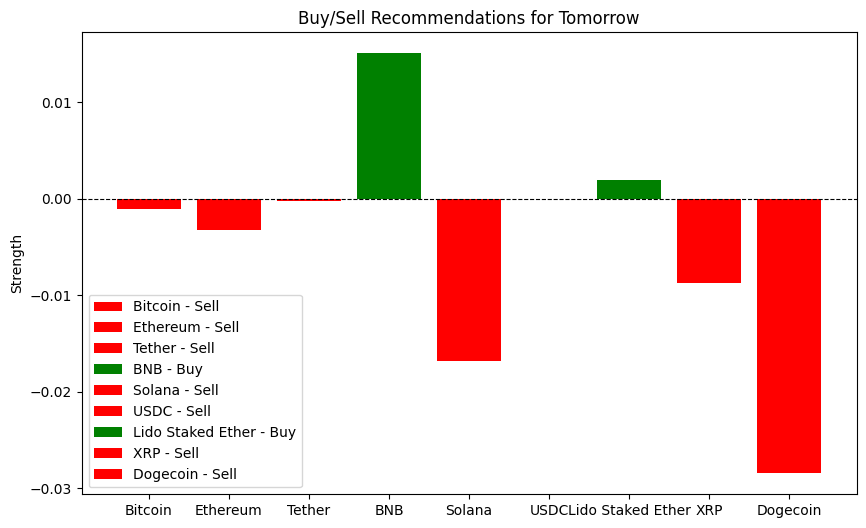

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
for crypto_name, data in crypto_dataframes.items():

    last_row = data.iloc[-1]
    last_date = last_row['Date']
    last_strategy_value = last_row['strategy_random_forest']
    action = "Hold"
    if last_strategy_value > 0:
        action = "Buy"
    elif last_strategy_value < 0:
        action = "Sell"

    # Color for Buy, Sell, and Hold
    color = 'green' if action == 'Buy' else 'red' if action == 'Sell' else 'grey'

    # Plot a bar for each cryptocurrency
    ax.bar(crypto_name, last_strategy_value, color=color, label=f'{crypto_name} - {action}')
ax.set_ylabel('Strength')
ax.set_title('Buy/Sell Recommendations for Tomorrow')
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Line at y=0 for reference
ax.legend()
plt.show()


In [ ]:
import joblib
from google.colab import files
joblib.dump(model, 'crypto_model.pkl')
files.download('crypto_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>